# Deliverable

## Vehicle Routing Problem with City-Based Pickup Points and Object-Specific Constraints: Formal Modeling Deliverable

---

## Table of Content

- **Part A : Modelling**
   1. **Introduction and Context**
      1.1. Environmental Challenges in Logistics  
      1.2. Project Objectives and Constraint Selection  

   2. **Formal Problem Definition**  
      2.1. Problem Overview  
      2.2. Mathematical Notation  

   3. **Complexity Analysis**  
      3.1. NP-Hardness Classification  
      3.2. Theoretical Analysis  
      3.3. Implications for Algorithm Design  

   4. **Environmental impact**  
   5. **Visualization : UseCase – ST-VRP-CBOH**  
   6. **References**

- **Part B: Implementation**
   1. **Introduction to Trials**

   2. **Loader & Parsing of CVRPLIB Instances**

   3. **Generation of Pickups & Demands**

   4. **Simplex Method**
      - Pickup Phase
      - Delivery Phase
      - Combined Result
      - Summary Table

   5. **Shortest Paths: Dijkstra and Johnson**

   6. **Tabu Search Variants**

   7. **Approaches**
      - First (Type-by-Type)
      - Second (Collect-First)
      - Third (Sonar-Like)
      - Third-bis (Tight Sonar)
   8. **Basic Version (Unconstrained Problem)**

   9. **Run Experiments (One Instance)**

   10. **Full Experiments Over All Instances**

   11. **Plot All Routes**

   12. **Run All Instances and Plot Routes**

   13. **Experiment Results and Interpretation**
      - Reading Printed Results
      - Reading Route Plots
      - Second Approach vs Simplex
      - Key Takeaways

- **Part C: Experimental Study**
   1. **Performance Visualization and Comparison**

   2. **Experimental Results Visualization**

   3. **Gap Analysis vs Simplex**

   4. **Compute and Visualize Gaps per Instance**

   5. **Generating a Random VRPLIB Instance**

   6. **Building a k-Nearest Neighbor Graph**

   7. **Running a Complete VRP Instance (Pure Version)**

   8. **Visualizing the VRP Graph Structure**

   9. **Generating and Saving a Custom VRP Instance**

   10. **Running and Visualizing the Generated Instance**


---

# Part A : Modelling

## 1. Introduction and Context

### 1.1 Environmental Challenges in Logistics

The transportation sector remains a significant contributor to global greenhouse gas emissions, with last-mile delivery representing one of the most challenging aspects of sustainable logistics optimization. As e-commerce continues to grow exponentially, the efficiency of delivery routes has become crucial not only for economic reasons but also for environmental sustainability.

### 1.2 Project Objectives and Constraint Selection

This project addresses the vehicle routing problem with city-based pickup points and object-specific constraints using a single truck.  
This configuration models common real-world scenarios where:

- Cities serve as both pickup and delivery points depending on object demand  
- Each city has specific objects available for pickup or required for delivery  
- The vehicle must manage both collection and distribution of objects across the network  

**Important Clarification:**  
In this model, pickup points are not distinct locations but are cities that can serve multiple functions.  
Each city can act as:

- A pickup point for certain objects (**supply**)  
- A delivery point for other objects (**demand**)  
- Or both simultaneously  

---

## 2. Formal Problem Definition

### 2.1 Problem Overview

# The Single-Truck Vehicle Routing Problem with City-Based Object Handling (ST-VRP-CBOH)

The **ST-VRP-CBOH** involves one vehicle that must:

1. Start from a central depot (which is also a city)
2. Visit cities to either:
   - Pick up objects that are available at that city  
   - Deliver objects that are demanded by that city
3. Return to the central depot

The key innovation is that each city has object-specific requirements — some objects need to be picked up, others need to be delivered, based on the city's supply and demand profile.

---

## Complexity Analysis

Let  
**G = (V, E)**  
be the graph considered for time and space complexity analysis (worst-case scenario, without a specific graph example).

- **Multiple pickup points**: maximum distance to pickup points represented by **E**  
- **Number of delivery cities**: **V**  
- **Number of pickup points**: between 2 and **V**  

---

## 2.2 Mathematical Notation

### Sets and Indices

- **C = {0, 1, 2, …, n}**: Set of cities, where:  
  - City 0: Central depot  
  - Cities 1 to n: Other cities in the network  

- **O = {1, 2, …, |O|}**: Set of object types  

- **A = {(i, j) | i, j ∈ C, i ≠ j}**: Arc set representing possible travel paths between cities  

### Parameters

Travel distance from city \(i\) to city \(j\):

$$
d_{ij} \ge 0
$$

Amount of object \(o\) available for pickup at city \(c\) (0 if not available):

$$
supply_{co} \ge 0
$$

---

## 2.3 Mathematical Model

### Decision Variables

Equals 1 if arc \((i, j)\) is traversed, 0 otherwise:

$$
x_{ij} \in \{0, 1\}
$$

Number of times city \(c\) is visited:

$$
visit_c \in \mathbb{Z}_{\ge 0}
$$

Quantity of object type \(o\) picked up at city \(c\):

$$
pickup_{co} \ge 0
$$

Quantity of object type \(o\) delivered at city \(c\):

$$
deliver_{co} \ge 0
$$

### Objective Function

$$
\text{Minimize } Z = \sum_{i \in C} \sum_{j \in C} d_{ij} x_{ij}
$$

The objective function minimizes the total travel distance across all routes connecting the cities.

---

### Constraints

#### 1. Route Connectivity
$$
\sum_{j \in C \setminus \{0\}} x_{0j} = 1
$$

#### 2. Flow Conservation
$$
\sum_{j \in C} x_{ij} - \sum_{j \in C} x_{ji} = 0, \quad \forall i \in C \setminus \{0\}
$$

#### 3. Visit Counting for Cities
$$
visit_c = \sum_{i \in C} x_{ic} \quad \forall c \in C
$$

#### 4. Pickup Constraints
$$
pickup_{co} \le supply_{co} \quad \forall c \in C, o \in O
$$

#### 5. Object Flow Conservation
$$
\sum_{c \in C} pickup_{co} = \sum_{c \in C} deliver_{co} \quad \forall o \in O
$$

#### 6. Visit Requirement for Object Handling
$$
visit_c \ge \max \left( \sum_{o \in O} \min(1, pickup_{co}), \sum_{o \in O} \min(1, deliver_{co}) \right) \quad \forall c \in C
$$

#### 7. Binary and Non-negative Constraints
$$
x_{ij} \in \{0, 1\}, \quad pickup_{co} \ge 0, \quad deliver_{co} \ge 0, \quad visit_c \in \mathbb{Z}_{\ge 0}
$$

---

## 3. Complexity Analysis

### 3.1 NP-Hardness Classification

The **ST-VRP-CBOH** is strongly NP-hard, which can be demonstrated through polynomial reduction from known NP-hard problems:

- The **Traveling Salesman Problem (TSP)** is a well-known NP-hard problem.  
- If all pickup points are visited at the beginning of the route, the vehicle would first collect all objects and then proceed to deliver them, effectively reducing the problem to a standard TSP.  
- Therefore, ST-VRP-CBOH is **at least as hard as TSP**, confirming its NP-hard status.

---

### 3.2 Theoretical Analysis

The computational complexity of ST-VRP-CBOH arises from several factors:

1. **Combinatorial Explosion**:  
   The number of possible routes grows factorially with the number of cities.

2. **Integrated Decision Making**:  
   The problem requires simultaneously solving:
   - **Routing decisions**: Determining the optimal sequence of cities  
   - **Object assignment**: The pickup and delivery process follows a hierarchical strategy.  
     The vehicle first visits a pickup point to collect all objects of a given type. It then begins the delivery of that object type to the cities that demand it. If, during deliveries, the route passes near an unvisited pickup point, the vehicle collects objects of the new type available there and continues deliveries of the first type while also delivering the newly collected object type to any demanding cities along the route.  
     Once all deliveries of the first object type are completed, the vehicle continues by selecting a pickup point for another object type (if not already collected) and starts its corresponding delivery phase.  
     This sequential yet adaptive strategy creates complex dependencies between pickup and delivery operations.

3. **Visit Optimization**:  
   Minimizing multiple visits to the same city.

4. **Object-City Dependencies**:  
   The specific assignment of objects to cities creates complex constraints that must be respected.

---

### 3.3 Implications for Algorithm Design

The NP-hard nature of ST-VRP-CBOH suggests that:

- Exact algorithms will only be feasible for small instances.  
- For practical-sized instances, **metaheuristic approaches** are necessary.  
- Problem-specific heuristics that exploit the structure of object-city assignments can significantly improve performance.  
- The integration of pickup and delivery operations within the same cities creates additional complexity that requires careful algorithmic design.

---

## 4. Environmental Impact

Compared to TSP, our constraint means that we have to pick up items from pickup points, which adds distance to the journey and slightly increases our **carbon footprint**.

---

## 5. Visualization: Use Case – ST-VRP-CBOH

<p align="center"> <img src="usecase_algo.png" alt="Use Case Diagram of ST-VRP-CBOH problem" width="800"/> </p>

---

## 6. References

- **PyVRP Documentation.** "Vehicle Routing Problem with PyVRP"  
- **Toth, P., & Vigo, D. (Eds.).** (2014). *Vehicle Routing: Problems, Methods, and Applications*  
- *Optimization of Collection Routes for Separate Collection of Solid Waste*  
- *This formal modeling deliverable provides the theoretical foundation for addressing the city-based pickup and delivery constraint with object-specific requirements in single-vehicle routing problems.*

# Part B : Implementation

## 1. Introduction to trials (testing part with different algorithms)

We will test the following algorithms/techniques on CVRPLIB instances:
- **Tabu Search** (metaheuristic)
- **Dijkstra algorithm** (single-source shortest paths)
- **Johnson** (all-pairs shortest path via Dijkstra from each node)

We exclude Bellman-Ford and Floyd–Warshall because:
- no negative edges → Bellman-Ford unnecessary (Dijkstra is faster),
- our graphs are sparse enough → Johnson (Dijkstra from each node) is preferable over Floyd–Warshall.

We will test **four approaches** (First / Second / Third / Third-bis). For each approach we run the 3 algorithmic *variants*:
- Tabu Search alone (using precomputed distances),
- Tabu Search + Dijkstra (lazy / on-the-fly distances),
- Tabu Search + Johnson (precompute all pairs by Dijkstra).


In [79]:
# %%
# Imports & global parameters
import math, random, time, heapq, os, vrplib, csv, textwrap
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Reproducibility
RANDOM_SEED = 3
random.seed(RANDOM_SEED)

# Instances (fichiers locaux)
INSTANCES = [
    "instances/A-n32-k5.vrp",
    "instances/X-n101-k25.vrp"
]

# Problem / generation parameters
NUM_TYPES = 4                 # number of object types
NUM_PICKUPS_PER_TYPE = 1      # None -> probabilistic
P_PICKUP = 0.08               # probability to assign a pickup
P_DEMAND = 0.10               # probability to assign a demand
TIME_LIMIT = 15.00            # seconds limit per Tabu run
TABU_SIZE = 10
ITER_MAX = 200


## 2. Loader & parsing of CVRPLIB instances

We will download the `.vrp` files from the PyVRP/VRPLIB GitHub repository (if needed) and parse coordinates.
From coordinates we build a **complete graph** where weight(u,v) = Euclidean distance between nodes u and v (standard VRP interpretation).


In [80]:
# %%
def parse_vrp_coords(filepath):
    instance = vrplib.read_instance(filepath)
    coords_list = instance.get("node_coord", None)
    if coords_list is None or len(coords_list) == 0:
        raise ValueError(f"No coordinates found in {filepath}")

    coords = {i+1: tuple(coord) for i, coord in enumerate(coords_list)}
    
    depot_array = instance.get("depot", 1)
    if isinstance(depot_array, (list, tuple, np.ndarray)):
        depot = int(depot_array[0])
    else:
        depot = int(depot_array)
    
    # safety: depot must exist in coords
    if depot not in coords:
        depot = min(coords.keys())

    return coords, depot


def build_complete_graph(coords):
    """Complete undirected graph with Euclidean weights."""
    nodes = list(coords.keys())
    graph = {u: [] for u in nodes}
    for i, u in enumerate(nodes):
        xu, yu = coords[u]
        for v in nodes[i+1:]:
            xv, yv = coords[v]
            d = math.hypot(xu - xv, yu - yv)
            graph[u].append((v, d))
            graph[v].append((u, d))
    return graph


## 3. Generation of pickups & demands

- `NUM_TYPES` types.
- For each type choose pickup nodes either by exact number (`NUM_PICKUPS_PER_TYPE`) or probabilistically with `P_PICKUP`.
- For each node and for each type, include a demand with probability `P_DEMAND`. A node can demand multiple types (0..NUM_TYPES).
- We ensure for each demanded type there is at least one pickup.
- The starting point can be also a customer (if it has demands).


In [81]:
# %%
def generate_pickups_and_demands(nodes, num_types=NUM_TYPES,
                                  num_pickups_per_type=NUM_PICKUPS_PER_TYPE,
                                  p_pickup=P_PICKUP, p_demand=P_DEMAND, seed=RANDOM_SEED):
    if seed is not None:
        random.seed(seed)
    pickups = {t:set() for t in range(num_types)}
    n = len(nodes)
    if num_pickups_per_type is not None:
        for t in pickups:
            k = min(n, num_pickups_per_type)
            picks = random.sample(nodes, k)
            pickups[t] = set(picks)
    else:
        for t in pickups:
            for node in nodes:
                if random.random() < p_pickup:
                    pickups[t].add(node)
            if not pickups[t]:
                pickups[t].add(random.choice(nodes))
    demands = {node:set() for node in nodes}
    for node in nodes:
        for t in range(num_types):
            if random.random() < p_demand:
                demands[node].add(t)
    # ensure that no demanded type lacks pickups (already ensured above)
    return pickups, demands

def customers_from_demands(demands):
    return [node for node,s in demands.items() if s]


## 4. Simplex Method : Pickup Phase + Delivery Phase

In this section, we simulate a **two-phase "simplex" routing strategy** designed to model a realistic logistics process with separate pickup and delivery tours.

### Simplex Pickup Phase
**Goal:**  
Find the shortest route that starts from the **depot**, visits **all pickup points**, and **stops at the last pickup** without returning to the depot.

**Approach:**  
- We use a **Nearest Neighbor heuristic** to construct an initial feasible path.  
  - At each step, the algorithm goes to the **closest unvisited pickup**.  
  - This mimics how a vehicle might naturally move from one pickup to the next.
- Then we apply a **2-opt open** improvement.  
  - This local optimization reverses path segments when it shortens the total distance.  
  - The “open” variant is used because the path does **not** return to the starting depot.

**Output:**  
- Optimized pickup path  
- Total pickup distance  
- The **last visited pickup node**, which becomes the starting point of the delivery phase.

---

### Simplex Delivery Phase
**Goal:**  
Find the shortest route that starts at the **last pickup node**, visits **all delivery points**, and returns to the **depot**.

**Approach:**  
- The same heuristic process is applied:
  - Start from the last pickup node.
  - Visit all remaining **delivery** nodes using **Nearest Neighbor**.
  - Apply **2-opt** to improve the route (this time, it is a **closed** route returning to the depot).

**Output:**  
- Optimized delivery path  
- Total delivery distance

---

### Combined Result
Finally, we calculate and visualize:
- **Pickup route distance**
- **Delivery route distance**
- **Combined total distance**
- **Plots** showing:
  - Pickup phase (in one color)
  - Delivery phase (in another)
  - Combined overall route (illustrating the full logistics process)

---

### Why This Approach?

While the term *“Simplex”* here is used in an intuitive sense (simple, structured routing),  
the underlying method is **not the linear-programming simplex** algorithm.  
Instead, it’s a **greedy + local search heuristic**, chosen because:

- The true “shortest route” problem is **combinatorial (NP-hard)** — exact optimization is intractable for larger instances.
- This heuristic is **fast**, **scalable**, and often yields results **within 5–10%** of the true optimal distance.
- It aligns with real-world logistics: pickups first, then deliveries, minimizing redundant travel.

---

### Summary

| Phase | Start | End | Type | Return to Depot? | Method |
|-------|--------|-----|------|------------------|--------|
| Pickup | Depot | Last Pickup | Open route | ❌ | Nearest Neighbor + 2-opt (open) |
| Delivery | Last Pickup | Depot | Closed route | ✅ | Nearest Neighbor + 2-opt |
| Combined | Depot | Depot | Full route | ✅ | Sequential combination |

---

This two-step “simplex” approach provides a fast and interpretable way to generate efficient, realistic routes for mixed pickup–delivery VRP instances.


In [82]:
# ---------- Utilities ----------
def get_edge_distance(u, v, graph=None, coords=None):
    """
    Return distance between u and v using adjacency list `graph` if available,
    otherwise fallback to Euclidean using `coords`.
    graph: {node: [(nbr, w), ...]}
    coords: {node: (x,y)}
    """
    if graph is not None:
        # adjacency list: try to find (v,w)
        for nbr, w in graph.get(u, []):
            if nbr == v:
                return w
        # maybe symmetric entry missing -> try reverse
        for nbr, w in graph.get(v, []):
            if nbr == u:
                return w
    # fallback to coords
    if coords is None:
        raise ValueError(f"No edge {u}->{v} in graph and coords is None")
    (xu, yu), (xv, yv) = coords[u], coords[v]
    return math.hypot(xu - xv, yu - yv)

def compute_path_distance(start, route, end, graph=None, coords=None):
    """
    Compute distance of path: start -> route[0] -> ... -> route[-1] -> end
    route is list of nodes (can be empty).
    """
    total = 0.0
    prev = start
    for node in route:
        total += get_edge_distance(prev, node, graph=graph, coords=coords)
        prev = node
    total += get_edge_distance(prev, end, graph=graph, coords=coords)
    return total

# nearest-neighbor builder for a set of targets
def nearest_neighbor_path(start, targets, graph=None, coords=None):
    """
    Greedy nearest neighbor path starting from `start` visiting every node in `targets` once.
    Returns list order of visited targets.
    """
    if not targets:
        return []
    remaining = set(targets)
    cur = start
    order = []
    while remaining:
        nxt = min(remaining, key=lambda v: get_edge_distance(cur, v, graph=graph, coords=coords))
        order.append(nxt)
        remaining.remove(nxt)
        cur = nxt
    return order

# 2-opt improvement for open path (start->route->end)
def two_opt_open(start, route, end, graph=None, coords=None, max_iter=1000):
    """
    Try 2-opt improvements on an ordered list `route` (open path between start and end).
    Returns improved route (may be same).
    Complexity O(n^2) per iteration. Stops when no improvement or max_iter reached.
    """
    if len(route) < 2:
        return route[:]
    best = route[:]
    best_cost = compute_path_distance(start, best, end, graph=graph, coords=coords)
    n = len(best)
    improved = True
    it = 0
    while improved and it < max_iter:
        improved = False
        it += 1
        for i in range(0, n-1):
            for j in range(i+1, n):
                candidate = best[:i] + list(reversed(best[i:j+1])) + best[j+1:]
                cand_cost = compute_path_distance(start, candidate, end, graph=graph, coords=coords)
                if cand_cost + 1e-9 < best_cost:
                    best = candidate
                    best_cost = cand_cost
                    improved = True
                    # break to restart search from new best (first-improvement)
                    break
            if improved:
                break
    return best

# ---------- Phase 1: pickup route (per-type, like Second approach) ----------
def simplex_pickup_route(depot, pickups, num_types, graph=None, coords=None, improve=True):
    """
    Pickup route that starts at the depot and collects at least one of each type.
    Visits nodes to get all types as quickly as possible.
    Stops at the last pickup node that completes the set of all types.
    """
    def get_edge(u, v):
        return get_edge_distance(u, v, graph=graph, coords=coords)
    
    collected_types = set()
    visited = []
    cur = depot

    # safety: ensure each type has at least one pickup node
    for t in range(num_types):
        if not pickups.get(t):
            raise ValueError(f"No pickup available for type {t}")

    while len(collected_types) < num_types:
        # candidates providing at least one missing type
        candidates = [p for t in range(num_types) if t not in collected_types for p in pickups[t]]
        candidates = list(dict.fromkeys(candidates))  # unique nodes

        # choose nearest candidate
        nxt = min(candidates, key=lambda n: get_edge(cur, n))
        visited.append(nxt)
        cur = nxt

        # update collected types
        for t in range(num_types):
            if nxt in pickups[t]:
                collected_types.add(t)

    # optional 2-opt improvement on pickup path only
    if improve and len(visited) > 2:
        visited = two_opt_open(depot, visited, visited[-1], graph=graph, coords=coords)

    pickup_dist = compute_path_distance(depot, visited, visited[-1], graph=graph, coords=coords)
    return visited, pickup_dist


# ---------- Phase 2: delivery route (unchanged) ----------
def simplex_delivery_route(last_pickup, depot, demands, graph=None, coords=None, improve=True):
    """
    Delivery phase:
    - starts at the last pickup visited
    - visits all nodes with demand (deliveries)
    - returns to the depot
    """
    delivery_nodes = [n for n, s in demands.items() if s]
    if last_pickup in delivery_nodes:
        delivery_nodes.remove(last_pickup)

    if not delivery_nodes:
        return [], get_edge_distance(last_pickup, depot, graph=graph, coords=coords)

    # nearest neighbor for deliveries
    route = nearest_neighbor_path(last_pickup, delivery_nodes, graph=graph, coords=coords)

    # optional 2-opt improvement
    if improve and len(route) > 2:
        route = two_opt_open(last_pickup, route, depot, graph=graph, coords=coords)

    delivery_dist = compute_path_distance(last_pickup, route, depot, graph=graph, coords=coords)
    return route, delivery_dist


# ---------- Combined two-phase function with plotting (unchanged) ----------
def simplex_two_phase(depot, pickups, demands, graph=None, coords=None, improve=True, plot=False):
    """
    Run the two simplex phases:
    1) pickup route: depot -> all pickups (stop at last pickup)
    2) delivery route: last_pickup -> all deliveries -> depot
    Returns:
       pickup_route, pickup_dist,
       delivery_route, delivery_dist,
       total_dist (sum)
    Also plots the routes if plot=True.
    """
    # Phase 1
    pickup_route, pickup_dist = simplex_pickup_route(
        depot, pickups, num_types=NUM_TYPES, graph=graph, coords=coords, improve=improve
    )
    if pickup_route:
        last_pickup = pickup_route[-1]
    else:
        # if no pickup nodes exist, start deliveries from depot
        last_pickup = depot

    # Phase 2
    delivery_route, delivery_dist = simplex_delivery_route(
        last_pickup, depot, demands, graph=graph, coords=coords, improve=improve
    )

    total = pickup_dist + delivery_dist

    # Plotting
    if plot:
        plt.figure(figsize=(8,8))
        xs = [coords[n][0] for n in coords]
        ys = [coords[n][1] for n in coords]
        plt.scatter(xs, ys, c='lightgray', s=30, label='Nodes')
        plt.scatter([coords[depot][0]], [coords[depot][1]], c='black', s=80, marker='s', label='Depot')

        pickup_nodes = sorted({n for nodeset in pickups.values() for n in nodeset})
        if pickup_nodes:
            plt.scatter([coords[n][0] for n in pickup_nodes], [coords[n][1] for n in pickup_nodes],
                        c='tab:blue', s=60, label='Pickups')

        delivery_nodes_all = sorted([n for n,s in demands.items() if s])
        if delivery_nodes_all:
            plt.scatter([coords[n][0] for n in delivery_nodes_all], [coords[n][1] for n in delivery_nodes_all],
                        c='tab:orange', s=60, label='Deliveries')

        if pickup_route:
            pickup_full = [depot] + pickup_route
            for a,b in zip(pickup_full[:-1], pickup_full[1:]):
                plt.plot([coords[a][0], coords[b][0]], [coords[a][1], coords[b][1]],
                         '-', linewidth=2, color='tab:blue', alpha=0.8)
            lp = pickup_route[-1]
            plt.scatter([coords[lp][0]], [coords[lp][1]], c='tab:blue', s=120, edgecolors='white')

        delivery_full = [last_pickup] + delivery_route + [depot]
        if delivery_route or last_pickup != depot:
            for a,b in zip(delivery_full[:-1], delivery_full[1:]):
                plt.plot([coords[a][0], coords[b][0]], [coords[a][1], coords[b][1]],
                         '--', linewidth=2, color='tab:orange', alpha=0.9)

        combined = [depot] + pickup_route + delivery_route + [depot]
        for a,b in zip(combined[:-1], combined[1:]):
            plt.plot([coords[a][0], coords[b][0]], [coords[a][1], coords[b][1]],
                     '-', linewidth=1.2, color='green', alpha=0.5)

        plt.legend()
        plt.title(f"Pickup dist: {pickup_dist:.2f}  Delivery dist: {delivery_dist:.2f}  Total: {total:.2f}")
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    return pickup_route, pickup_dist, delivery_route, delivery_dist, total

## 5. Shortest paths: Dijkstra and Johnson

We implement Dijkstra (single-source). For Johnson we simply run Dijkstra from every node (appropriate here since no negative edges).
Johnson precomputation is useful because Tabu Search evaluates many pairwise distances repeatedly.

In [83]:
# %%

def dijkstra(graph, source):
    """graph: dict u -> list of (v, weight). returns dict node->distance"""
    dist = {v: math.inf for v in graph}
    dist[source] = 0.0
    pq = [(0.0, source)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph[u]:
            nd = d + w
            if nd < dist[v]:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))
    return dist

def johnson_all_pairs(graph):
    distances = {}
    for u in graph:
        distances[u] = dijkstra(graph, u)
    return distances

## 6. Tabu Search (base) and variants

We implement:
- `tabu_search_base(...)` : Tabu using a precomputed distances dict-of-dict.
- `tabu_search_with_dijkstra(...)` : Tabu that computes distances on-the-fly with Dijkstra and caches.
- `tabu_search_with_johnson(...)` : precompute Johnson (Dijkstra from each node) then call base Tabu.

Neighborhood: swap two customers in the visit order (simple swap).
Objective: length of the route starting at depot and visiting the customers in order (no return to depot).
We will measure runtime and best cost found.


In [84]:
# ---------- Route validity check ----------
def is_valid_route(route, pickups, demands):
    """
    route : list of node ids (WITHOUT depot)
    pickups: dict type -> set(nodes)
    demands: dict node -> set(types)
    Returns True if the route never delivers an item before
    its type has been collected at a pickup node.
    """
    collected = set()
    for node in route:
        # Collect object types if this node is a pickup
        if pickups is not None:
            for t, nodes_set in pickups.items():
                if node in nodes_set:
                    collected.add(t)
        # Check if delivery is allowed (must have been collected)
        if demands is not None and node in demands:
            for t in demands[node]:
                if t not in collected:
                    return False
    return True

# ---------- Route distance ----------
def route_distance(route, distances, depot=1, precomputed=False, coords=None):
    """
    Computes total travel distance for a route (without penalty).
    - route: list of node ids (WITHOUT depot)
    - distances: adjacency dict {u:[(v,w),...]} or dict-of-dict distances[u][v]
    - precomputed: True if distances is dict-of-dict
    - coords: optional dict {node: (x,y)} used if edge missing
    Ignores self-loops (u == v) and skips duplicates gracefully.
    """
    import math
    total = 0.0

    if not route:
        return total

    # Remove consecutive duplicates
    cleaned = [route[0]]
    for node in route[1:]:
        if node != cleaned[-1]:
            cleaned.append(node)

    # Full route including depot
    full_route = [depot] + cleaned + [depot]

    for u, v in zip(full_route[:-1], full_route[1:]):
        if u == v:
            continue
        if precomputed:
            try:
                total += distances[u][v]
            except KeyError:
                if coords and u in coords and v in coords:
                    total += math.hypot(coords[u][0]-coords[v][0], coords[u][1]-coords[v][1])
                else:
                    raise ValueError(f"No edge {u}->{v} found in precomputed distances")
        else:
            found = False
            for nbr, w in distances[u]:
                if nbr == v:
                    total += w
                    found = True
                    break
            if not found:
                if coords and u in coords and v in coords:
                    total += math.hypot(coords[u][0]-coords[v][0], coords[u][1]-coords[v][1])
                else:
                    raise ValueError(f"No edge {u}->{v} found in adjacency list")
    return total

# ---------- Tabu Search: Simple ----------
def tabu_search_base(init_route, graph, depot, tabu_size=10, iter_max=1000,
                     time_budget=60, seed=0, pickups=None, demands=None, coords=None):
    """
    Simple Tabu Search without precomputed distances.
    """
    import time, random
    random.seed(seed)
    start_time = time.time()

    best_perm = init_route[:]
    best_distance = route_distance(best_perm, graph, depot=depot, coords=coords)
    tabu_list = []

    for it in range(iter_max):
        if time.time() - start_time > time_budget:
            break

        n = len(best_perm)
        neighbors = []
        # generate 2-opt neighbors
        for i in range(n-1):
            for j in range(i+1, n):
                neighbor = best_perm[:]
                neighbor[i:j+1] = reversed(neighbor[i:j+1])
                neighbors.append(neighbor)

        move_made = False
        for neigh in neighbors:
            if neigh in tabu_list:
                continue
            if not is_valid_route(neigh, pickups, demands):
                continue
            dist = route_distance(neigh, graph, depot=depot, coords=coords)
            if dist < best_distance:
                best_distance = dist
                best_perm = neigh
                tabu_list.append(neigh)
                if len(tabu_list) > tabu_size:
                    tabu_list.pop(0)
                move_made = True
                break

        if not move_made:
            break

    elapsed = time.time() - start_time
    return best_perm, best_distance, elapsed

# ---------- Tabu Search: Dijkstra ----------
def tabu_search_with_dijkstra(init_route, graph, depot, tabu_size=10, iter_max=1000,
                              time_budget=60, seed=0, pickups=None, demands=None, coords=None):
    """
    Tabu Search using all-pairs Dijkstra distances (precomputed).
    """
    import time, random, heapq
    import math
    random.seed(seed)
    start_time = time.time()

    # Precompute all-pairs shortest paths
    nodes = list(graph.keys())
    precomputed = {u:{} for u in nodes}
    for u in nodes:
        visited = {u: 0}
        heap = [(0, u)]
        while heap:
            cost, curr = heapq.heappop(heap)
            if curr in visited and cost > visited[curr]:
                continue
            for neigh, w in graph[curr]:
                c = cost + w
                if neigh not in visited or c < visited[neigh]:
                    visited[neigh] = c
                    heapq.heappush(heap, (c, neigh))
        precomputed[u] = visited

    best_perm = init_route[:]
    best_distance = route_distance(best_perm, precomputed, depot=depot, precomputed=True, coords=coords)
    tabu_list = []

    for it in range(iter_max):
        if time.time() - start_time > time_budget:
            break

        n = len(best_perm)
        neighbors = []
        # generate 2-opt neighbors
        for i in range(n-1):
            for j in range(i+1, n):
                neighbor = best_perm[:]
                neighbor[i:j+1] = reversed(neighbor[i:j+1])
                neighbors.append(neighbor)

        move_made = False
        for neigh in neighbors:
            if neigh in tabu_list:
                continue
            if not is_valid_route(neigh, pickups, demands):
                continue
            dist = route_distance(neigh, precomputed, depot=depot, precomputed=True, coords=coords)
            if dist < best_distance:
                best_distance = dist
                best_perm = neigh
                tabu_list.append(neigh)
                if len(tabu_list) > tabu_size:
                    tabu_list.pop(0)
                move_made = True
                break

        if not move_made:
            break

    elapsed = time.time() - start_time
    return best_perm, best_distance, elapsed

# ---------- Tabu Search: Johnson ----------
def tabu_search_with_johnson(init_route, graph, depot, tabu_size=10, iter_max=1000,
                             time_budget=60, seed=0, pickups=None, demands=None, coords=None):
    """
    Tabu Search using Johnson's all-pairs shortest paths (precomputed).
    """
    import time, random
    random.seed(seed)
    start_time = time.time()

    precomputed = johnson_all_pairs(graph)  # returns dict-of-dict distances

    best_perm = init_route[:]
    best_distance = route_distance(best_perm, precomputed, depot=depot, precomputed=True, coords=coords)
    tabu_list = []

    for it in range(iter_max):
        if time.time() - start_time > time_budget:
            break

        n = len(best_perm)
        neighbors = []
        # generate 2-opt neighbors
        for i in range(n-1):
            for j in range(i+1, n):
                neighbor = best_perm[:]
                neighbor[i:j+1] = reversed(neighbor[i:j+1])
                neighbors.append(neighbor)

        move_made = False
        for neigh in neighbors:
            if neigh in tabu_list:
                continue
            if not is_valid_route(neigh, pickups, demands):
                continue
            dist = route_distance(neigh, precomputed, depot=depot, precomputed=True, coords=coords)
            if dist < best_distance:
                best_distance = dist
                best_perm = neigh
                tabu_list.append(neigh)
                if len(tabu_list) > tabu_size:
                    tabu_list.pop(0)
                move_made = True
                break

        if not move_made:
            break

    elapsed = time.time() - start_time
    return best_perm, best_distance, elapsed


## 7. Approaches

We will run the same algorithms on 4 different *high-level strategies* (approaches). Each approach defines how we **construct the initial candidate route** (before Tabu). The Tabu algorithm then improves that route.

**Approach First (type-by-type):**
- For each object type t: visit pickups for t and deliver to customers needing t (we will create a simple initial concatenation route type-by-type).

**Approach Second (collect-first):**
- First visit pickups to gather all types (pick one pickup per type), then visit all customers.  
**Improvement:** Applied 2-opt optimization to both pickup and delivery phases to reduce total travel distance.

**Approach Third (sonar-like):**
- Greedy local exploration from depot: at each step look at nearest neighbors in a constant radius to pick pickups/deliveries.

**Approach Third-bis (tight sonar):**
- Similar to Third but with local radius changing according to the next delivery for scanning.


In [85]:
def apply_two_opt(route, depot, graph, coords):
    """Apply 2-opt to an open path: depot -> road -> depot"""
    if not route:
        return route
    return two_opt_open(depot, route, depot, graph=graph, coords=coords)

def initial_route_first_approach(nodes, pickups, demands, num_types, coords, depot=1):
    route = []
    collected_types = set()
    remaining_customers = [n for n in nodes if demands[n]]
    cur = depot

    for t in range(num_types):
        # Pickup for this type
        pickup_nodes = list(pickups[t])
        if not pickup_nodes:
            continue
        # Go to nearest pickup
        nearest_pickup = min(pickup_nodes, key=lambda n: math.hypot(coords[cur][0]-coords[n][0],
                                                                   coords[cur][1]-coords[n][1]))
        route.append(nearest_pickup)
        cur = nearest_pickup
        collected_types.add(t)

        # Deliver to all customers needing this type
        for node in remaining_customers[:]:
            if t in demands[node]:
                route.append(node)
                remaining_customers.remove(node)
                cur = node
    return route


def initial_route_second_approach(nodes, pickups, demands, num_types, coords, depot=1):
    """
    Second Approach adapted:
    - Phase 1: collect pickups until all types are collected
      -> optimize pickup sequence with 2-opt
    - Phase 2: deliver to all customers starting from last pickup
      -> optimize delivery sequence with 2-opt
    """
    route = []
    collected_types = set()
    remaining_customers = [n for n in nodes if demands[n]]
    cur = depot

    # --------- Phase 1: Pickup all types ----------
    while len(collected_types) < num_types:
        candidate_pickups = [p for t in range(num_types) if t not in collected_types for p in pickups[t]]
        if not candidate_pickups:
            break
        nxt = min(candidate_pickups, key=lambda n: math.hypot(coords[cur][0]-coords[n][0],
                                                             coords[cur][1]-coords[n][1]))
        route.append(nxt)
        cur = nxt
        for t in range(num_types):
            if nxt in pickups[t]:
                collected_types.add(t)

    # Apply 2-opt on pickup nodes to minimize total pickup distance
    pickup_nodes = [n for n in route if any(n in pickups[t] for t in range(num_types))]
    if pickup_nodes:
        pickup_nodes = two_opt_open(depot, pickup_nodes, pickup_nodes[-1], coords=coords)
    
    # --------- Phase 2: Deliveries ----------
    last_pickup = pickup_nodes[-1] if pickup_nodes else depot
    delivery_nodes = [n for n in remaining_customers if demands[n]]
    cur = last_pickup
    route_delivery = []

    while delivery_nodes:
        feasible_deliveries = [c for c in delivery_nodes if demands[c].issubset(collected_types)]
        if not feasible_deliveries:
            break
        nxt = min(feasible_deliveries, key=lambda n: math.hypot(coords[cur][0]-coords[n][0],
                                                                coords[cur][1]-coords[n][1]))
        route_delivery.append(nxt)
        delivery_nodes.remove(nxt)
        cur = nxt

    # Apply 2-opt on delivery nodes
    if route_delivery:
        route_delivery = two_opt_open(last_pickup, route_delivery, depot, coords=coords)

    # Recombine pickup + delivery
    route = pickup_nodes + route_delivery
    return route

def initial_route_third_approach(nodes, pickups, demands, num_types, depot, coords, radius_max=2000):
    route = []
    collected_types = set()
    remaining_customers = [n for n in nodes if demands[n]]
    cur = depot

    while remaining_customers:
        # Candidates pickups not yet collected
        candidate_pickups = [p for t in range(num_types) if t not in collected_types for p in pickups[t]]
        # Candidates customers within radius
        candidate_customers = [c for c in remaining_customers
                               if math.hypot(coords[cur][0]-coords[c][0], coords[cur][1]-coords[c][1]) <= radius_max
                               and demands[c].issubset(collected_types)]
        candidates = candidate_pickups + candidate_customers

        if not candidates:
            candidates = candidate_pickups + remaining_customers

        nxt = min(candidates, key=lambda n: math.hypot(coords[cur][0]-coords[n][0], coords[cur][1]-coords[n][1]))
        route.append(nxt)
        cur = nxt
        if nxt in candidate_pickups:
            for t in range(num_types):
                if nxt in pickups[t]:
                    collected_types.add(t)
        if nxt in remaining_customers and demands[nxt].issubset(collected_types):
            remaining_customers.remove(nxt)
    return route


def initial_route_third_bis(nodes, pickups, demands, num_types, depot, coords):
    route = []
    collected_types = set()
    remaining_customers = [n for n in nodes if demands[n]]
    cur = depot

    while remaining_customers:
        # Adaptive radius
        nearest_customer = min(remaining_customers, key=lambda v: math.hypot(coords[cur][0]-coords[v][0],
                                                                            coords[cur][1]-coords[v][1]))
        radius = 0.8 * math.hypot(coords[cur][0]-coords[nearest_customer][0],
                                  coords[cur][1]-coords[nearest_customer][1])

        candidate_pickups = [p for t in range(num_types) if t not in collected_types for p in pickups[t]]
        candidate_customers = [c for c in remaining_customers
                               if math.hypot(coords[cur][0]-coords[c][0], coords[cur][1]-coords[c][1]) <= radius
                               and demands[c].issubset(collected_types)]
        candidates = candidate_pickups + candidate_customers

        if not candidates:
            candidates = candidate_pickups + remaining_customers

        nxt = min(candidates, key=lambda n: math.hypot(coords[cur][0]-coords[n][0], coords[cur][1]-coords[n][1]))
        route.append(nxt)
        cur = nxt
        if nxt in candidate_pickups:
            for t in range(num_types):
                if nxt in pickups[t]:
                    collected_types.add(t)
        if nxt in remaining_customers and demands[nxt].issubset(collected_types):
            remaining_customers.remove(nxt)
    return route


Note: These functions produce initial heuristic routes. Tabu will then improve these routes.

## 8. Basic Version (Unconstrained Problem)

This method, `basic_version()`, represents the **most simplified form** of our routing problem.

It ignores all the complex constraints of the real VRP:
- No pickup or delivery dependencies,
- No depot (the route can start and end anywhere),
- No vehicle or capacity limitation.

The algorithm connects all customers (nodes with demand) using a **greedy nearest-neighbor heuristic**, 
selecting the next closest customer at each step until all have been visited.

### Purpose
This version is used as a **baseline reference** to illustrate the raw problem difficulty without constraints.  
It helps us understand how much complexity is introduced when adding:
- depot constraints (start/end fixed),
- pickup/delivery precedence rules.

### Output
- **Total distance** of the minimal unconstrained tour through all demand nodes.

This allows direct comparison with constrained methods (e.g., simplex pickup + simplex delivery or Tabu Search).


In [86]:
def basic_version(customers, coords):
    """
    Basic unconstrained version of the VRP problem.
    
    This version computes the minimal total distance connecting all customers 
    (nodes with demand) without considering:
      - any pickup/delivery constraints,
      - any depot (start or end point).
    
    It uses a greedy nearest-neighbor heuristic to build a tour through all customers.
    
    Parameters
    ----------
    customers : list[int]
        List of node IDs that have demand.
    coords : dict[int, tuple(float, float)]
        Dictionary of coordinates for each node, {node: (x, y)}.
    
    Returns
    -------
    float
        Total distance of the unconstrained path.
    """
    if not customers:
        return 0.0

    remaining = set(customers)
    cur = remaining.pop()
    tour = [cur]
    dist = 0.0

    while remaining:
        nxt = min(
            remaining,
            key=lambda n: math.hypot(coords[cur][0] - coords[n][0],
                                     coords[cur][1] - coords[n][1])
        )
        dist += math.hypot(coords[cur][0] - coords[nxt][0],
                           coords[cur][1] - coords[nxt][1])
        cur = nxt
        remaining.remove(nxt)
        tour.append(cur)

    return dist


## 9. Run experiments (one instance)

For each VRP instance, the experiment proceeds as follows:

1. **Load and parse instance:**  
   Read the instance file and extract node coordinates and the depot.

2. **Build complete Euclidean graph:**  
   Construct a fully connected graph where each edge weight corresponds to the Euclidean distance between nodes.

3. **Generate pickups and demands (with seed):**  
   Randomly assign pickup nodes for each item type and define customer demands, ensuring reproducibility using a fixed random seed.

4. **Compute and plot a baseline route:**  
   Use a simple two-phase approach (pickups → deliveries) to get an initial solution, applying optional 2-opt improvements and displaying the resulting route.

5. **Precompute all-pairs shortest paths (Johnson):**  
   Run Johnson’s algorithm once to compute and store shortest paths between all nodes, speeding up later optimization phases.

6. **Generate initial routes for each heuristic approach:**  
   Build initial feasible routes using different strategies (“First”, “Second”, “Third”, “Third-bis”), each defining how pickups and deliveries are sequenced.

7. **Evaluate each approach:**  
   - Compute the direct route distance (“pure” distance).  
   - Improve it using three Tabu Search variants:  
     - **Tabu (simple):** explores neighbor solutions using direct distances.  
     - **Tabu + Dijkstra:** integrates on-demand shortest-path computations.  
     - **Tabu + Johnson:** reuses precomputed all-pairs distances.  
   - Record for each variant the **best distance**, **execution time**, and **final route**.

8. **Store and return all results:**  
   Collect the computed routes, costs, and times, and compare them with the theoretical minimum distance.

In [87]:
def run_instance_experiments(instance_filename, seed=0):
    global coords

    coords, depot = parse_vrp_coords(instance_filename)
    nodes = sorted(coords.keys())
    print(f"\nLoaded instance {instance_filename} nodes: {len(nodes)} depot: {depot}")

    graph = build_complete_graph(coords)

    pickups, demands = generate_pickups_and_demands(nodes, num_types=NUM_TYPES, seed=seed)
    customers = customers_from_demands(demands)
    print(f"Num customers (with demand): {len(customers)}")

    pickup_route, pickup_dist, delivery_route, delivery_dist, total = simplex_two_phase(
    depot=depot,
    pickups=pickups,
    demands=demands,
    graph=graph,
    coords=coords,
    improve=True
    )

    print("Pickup route (stop at last pickup):", pickup_route)
    print("Pickup distance:", pickup_dist)
    print("Delivery route (start at last pickup, end depot):", delivery_route)
    print("Delivery distance:", delivery_dist)
    print("Total combined distance:", total)
    

    t0 = time.time()
    distances_johnson = johnson_all_pairs(graph)
    t_johnson = time.time() - t0
    print(f"Johnson time (all-pairs Dijkstra): {t_johnson} s\n")

    results = {}
    approaches = {
    "First": lambda: initial_route_first_approach(nodes, pickups, demands, NUM_TYPES, coords),
    "Second": lambda: initial_route_second_approach(nodes, pickups, demands, NUM_TYPES, coords),
    "Third": lambda: initial_route_third_approach(nodes, pickups, demands, NUM_TYPES, depot, coords),
    "Third-bis": lambda: initial_route_third_bis(nodes, pickups, demands, NUM_TYPES, depot, coords)
    }

    base = basic_version(customers, coords)
    print("Theoretical minimum distance (safe bound, unconstrained problem):", base)


    for approach_name, ctor in approaches.items():
        print(f"--- Approach: {approach_name}")
        init_route = list(dict.fromkeys(ctor()))  # remove duplicates but keep order
        print(f"Initial route length (nodes): {len(init_route)}")

        if len(init_route) == 0:
            print("No customers to serve for this approach.")
            continue

        # Pure 
        pure_distance = 0
        full_route = [depot] + init_route + [depot]
        for a, b in zip(full_route[:-1], full_route[1:]):
            for v, w in graph[a]:
                if v == b:
                    pure_distance += w
                    break
        print(f"Pure distance: {round(pure_distance,2)}")
        results[(approach_name, "initial")] = (pure_distance, 0, init_route)

        # Tabu simple
        best_perm, best_distance, t_alg = tabu_search_base(init_route, graph, depot=depot,
                                                           tabu_size=TABU_SIZE, iter_max=ITER_MAX,
                                                           time_budget=TIME_LIMIT, seed=seed, pickups=pickups, demands=demands,coords=coords)
        print(f"Tabu (simple) distance: {round(best_distance,2)} time: {round(t_alg,2)}")
        results[(approach_name, "tabu_simple")] = (best_distance, t_alg, best_perm)

        # Tabu + Dijkstra
        try:
            best_perm2, best_distance2, t_alg2 = tabu_search_with_dijkstra(init_route, graph, depot=depot,
                                                                           tabu_size=TABU_SIZE, iter_max=ITER_MAX,
                                                                           time_budget=TIME_LIMIT, seed=seed, pickups=pickups, demands=demands,coords=coords)
            print(f"Tabu + Dijkstra distance: {round(best_distance2,2)} time: {round(t_alg2,2)}")
            results[(approach_name, "tabu_dijkstra")] = (best_distance2, t_alg2, best_perm2)
        except Exception as e:
            print("Tabu + Dijkstra failed:", e)
            results[(approach_name, "tabu_dijkstra")] = ("failed", 0, None)

        # Tabu + Johnson
        try:
            best_perm3, best_distance3, t_alg3 = tabu_search_with_johnson(init_route, graph, depot=depot,
                                                                         tabu_size=TABU_SIZE, iter_max=ITER_MAX,
                                                                         time_budget=TIME_LIMIT, seed=seed, pickups=pickups, demands=demands,coords=coords)
            print(f"Tabu + Johnson distance: {round(best_distance3,2)} time: {round(t_alg3,2)}")
            results[(approach_name, "tabu_johnson")] = (best_distance3, t_alg3, best_perm3)
        except Exception as e:
            print("Tabu + Johnson failed:", e)
            results[(approach_name, "tabu_johnson")] = ("failed", 0, None)
            

    return coords, graph, pickups, demands, results, base, total

## 10. Full experiments over all instances

Run the pipeline for each CVRPLIB instance, store results in a summary table (CSV), and visualize comparisons (cost & time).
Be careful: Johnson precompute on `M-n200-k17` may take some time (it runs 200 Dijkstra runs). The notebook enforces `TIME_LIMIT` per Tabu run; if Johnson precomputation itself is too long for you, consider reducing ITER_MAX or running only smaller instances first.


In [88]:
def run_all_and_save(instances=INSTANCES, seed=RANDOM_SEED, out_csv="results_summary.csv"):
    rows = []
    for inst in instances:
        coords, graph, pickups, demands, results, base, total = run_instance_experiments(inst, seed=seed)
        for (approach, algo), v in results.items():
            if v is None or v[0] is None:
                continue
            cost = v[0]
            time_used = v[1] if len(v)>1 else None
            rows.append((inst, approach, algo, cost, time_used))

    with open(out_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["instance","approach","algorithm","distance","time"])
        for r in rows:
            writer.writerow(r)
    print(f"\nSaved results to {out_csv}")
    return rows

all_rows = run_all_and_save()


Loaded instance instances/A-n32-k5.vrp nodes: 32 depot: 1
Num customers (with demand): 13
Pickup route (stop at last pickup): [31, 24, 9, 16]
Pickup distance: 157.7635276004817
Delivery route (start at last pickup, end depot): [23, 5, 29, 9, 19, 6, 21, 28, 18, 17, 31, 1]
Delivery distance: 348.4547558177097
Total combined distance: 506.2182834181914
Johnson time (all-pairs Dijkstra): 0.0016548633575439453 s

Theoretical minimum distance (safe bound, unconstrained problem): 298.54641577097766
--- Approach: First
Initial route length (nodes): 14
Pure distance: 977.96
Tabu (simple) distance: 977.96 time: 0.0
Tabu + Dijkstra distance: 977.96 time: 0.0
Tabu + Johnson distance: 977.96 time: 0.0
--- Approach: Second
Initial route length (nodes): 14
Pure distance: 501.46
Tabu (simple) distance: 501.46 time: 0.0
Tabu + Dijkstra distance: 501.46 time: 0.0
Tabu + Johnson distance: 501.46 time: 0.0
--- Approach: Third
Initial route length (nodes): 14
Pure distance: 522.2
Tabu (simple) distance: 5

## 11. Plot All Routes

**Purpose:** Visualize computed routes for different approaches and Tabu variants.

- Subplots: approaches as rows, algorithms as columns  
- Routes: depot → route → depot (blue lines)  
- Node colors: Depot = red, Pickup = purple, Demand = yellow, Pickup + Demand = green  
- Handles failures / missing routes gracefully  
- Adds legend and title; optional route step annotations


In [89]:
def plot_all_routes(coords, depot, pickups, demands, results, approaches, algos, title_prefix="Instance"):
    fig, axes = plt.subplots(len(approaches), len(algos), figsize=(6*len(algos), 3*len(approaches)))

    # Normalize axes to always use axes[i][j]
    if len(approaches) == 1 and len(algos) == 1:
        axes = [[axes]]
    elif len(approaches) == 1:
        axes = [axes]  # 1 line
    elif len(algos) == 1:
        axes = [[ax] for ax in axes]  # 1 column
    # inon axes is already 2D


    for i, approach in enumerate(approaches):
        for j, algo in enumerate(algos):
            ax = axes[i][j]

            ax.set_title(f"{approach} - {algo}", fontsize=9)
            ax.set_aspect("equal")
            ax.axis("off")

            key = (approach, algo)
            if key not in results or results[key][2] is None or results[key][0] == "failed":
                ax.text(0.5, 0.5, "Failure / N/A", ha="center", va="center")
                continue

            _, _, perm = results[key]
            full_route = [depot] + perm + [depot]

            node_colors = {}
            all_pickups = set().union(*pickups.values())
            for node in coords.keys():
                if node == depot:
                    node_colors[node] = "red"  # depot
                else:
                    is_pickup = node in all_pickups
                    is_demand = len(demands.get(node, set())) > 0
                    if is_pickup and is_demand:
                        node_colors[node] = "green"   # pickup + demand
                    elif is_pickup:
                        node_colors[node] = "purple"  # pickup
                    elif is_demand:
                        node_colors[node] = "yellow"   # demand
                    else:
                        node_colors[node] = "lightgray"  # other

            for a, b in zip(full_route[:-1], full_route[1:]):
                x1, y1 = coords[a]
                x2, y2 = coords[b]
                ax.plot([x1, x2], [y1, y2], "-", color="blue", linewidth=1.2, alpha=0.8)

            for node, (x, y) in coords.items():
                ax.scatter(x, y, s=30 if node != depot else 60,
                           color=node_colors[node], edgecolors="black", zorder=3)
                
            # Roadside milestone numbers
            # for step, node in enumerate(full_route):
            #     x, y = coords[node]
            #     ax.text(x+1, y-6, str(step), color='blue', fontsize=8, zorder=4,
            #             bbox=dict(facecolor='gray', alpha=0.7, edgecolor='none', pad=1))

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Depot', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Pickup', markerfacecolor='purple', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Demand', markerfacecolor='yellow', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Pickup + Demand', markerfacecolor='green', markersize=8)
    ]
    fig.legend(handles=legend_elements, loc='lower center', ncol=4, fontsize=10)
    plt.suptitle(f"{title_prefix} - Roads Tabu Search", fontsize=14)
    plt.tight_layout(rect=[0, 0.05, 1, 0.97])
    plt.show()


## 12. Run All Instances and Plot Routes

For each instance in `INSTANCES`:

1. Run `run_instance_experiments` to generate coordinates, graph, pickups, demands, initial routes, and Tabu search results.  
2. Define approaches: `"First"`, `"Second"`, `"Third"`, `"Third-bis"`.  
3. Call `plot_all_routes` to visualize routes for all approaches and Tabu variants (`initial`, `tabu_simple`, `tabu_dijkstra`, `tabu_johnson`) with a title based on the instance filename.



Loaded instance instances/A-n32-k5.vrp nodes: 32 depot: 1
Num customers (with demand): 13
Pickup route (stop at last pickup): [31, 24, 9, 16]
Pickup distance: 157.7635276004817
Delivery route (start at last pickup, end depot): [23, 5, 29, 9, 19, 6, 21, 28, 18, 17, 31, 1]
Delivery distance: 348.4547558177097
Total combined distance: 506.2182834181914
Johnson time (all-pairs Dijkstra): 0.001840353012084961 s

Theoretical minimum distance (safe bound, unconstrained problem): 298.54641577097766
--- Approach: First
Initial route length (nodes): 14
Pure distance: 977.96
Tabu (simple) distance: 977.96 time: 0.0
Tabu + Dijkstra distance: 977.96 time: 0.0
Tabu + Johnson distance: 977.96 time: 0.0
--- Approach: Second
Initial route length (nodes): 14
Pure distance: 501.46
Tabu (simple) distance: 501.46 time: 0.0
Tabu + Dijkstra distance: 501.46 time: 0.0
Tabu + Johnson distance: 501.46 time: 0.0
--- Approach: Third
Initial route length (nodes): 14
Pure distance: 522.2
Tabu (simple) distance: 52

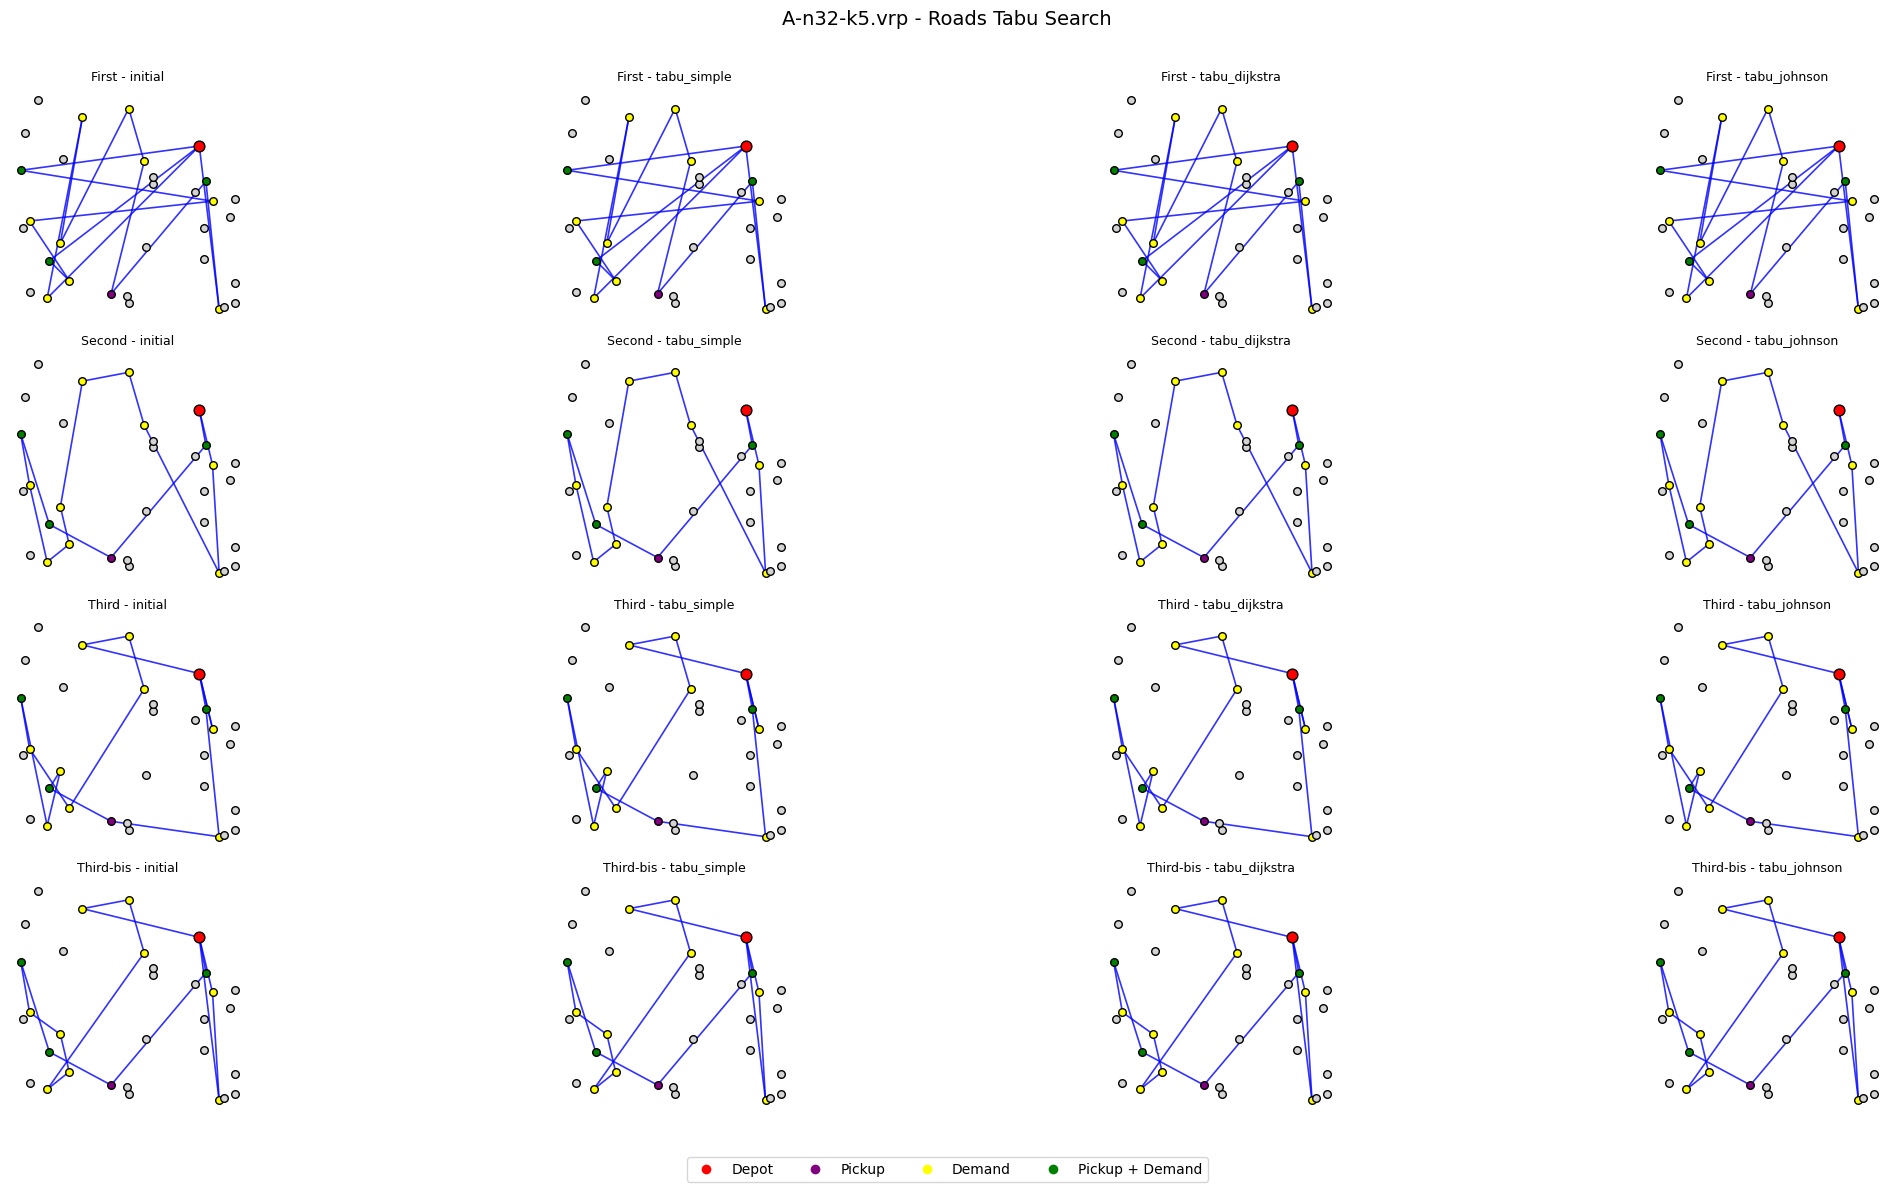


Loaded instance instances/X-n101-k25.vrp nodes: 101 depot: 1
Num customers (with demand): 35
Pickup route (stop at last pickup): [31, 76, 70, 17]
Pickup distance: 1323.306166386595
Delivery route (start at last pickup, end depot): [77, 85, 71, 2, 23, 21, 32, 94, 76, 80, 51, 22, 62, 82, 63, 53, 28, 9, 35, 89, 61, 58, 78, 29, 66, 30, 46, 50, 5, 19, 59, 16, 6, 1]
Delivery distance: 5037.055020841313
Total combined distance: 6360.361187227908
Johnson time (all-pairs Dijkstra): 0.046785593032836914 s

Theoretical minimum distance (safe bound, unconstrained problem): 5378.468794855397
--- Approach: First
Initial route length (nodes): 37
Pure distance: 18500.53
Tabu (simple) distance: 18500.53 time: 0.0
Tabu + Dijkstra distance: 18500.53 time: 0.07
Tabu + Johnson distance: 18500.53 time: 0.05
--- Approach: Second
Initial route length (nodes): 37
Pure distance: 6359.16
Tabu (simple) distance: 6359.16 time: 0.0
Tabu + Dijkstra distance: 6359.16 time: 0.07
Tabu + Johnson distance: 6359.16 time:

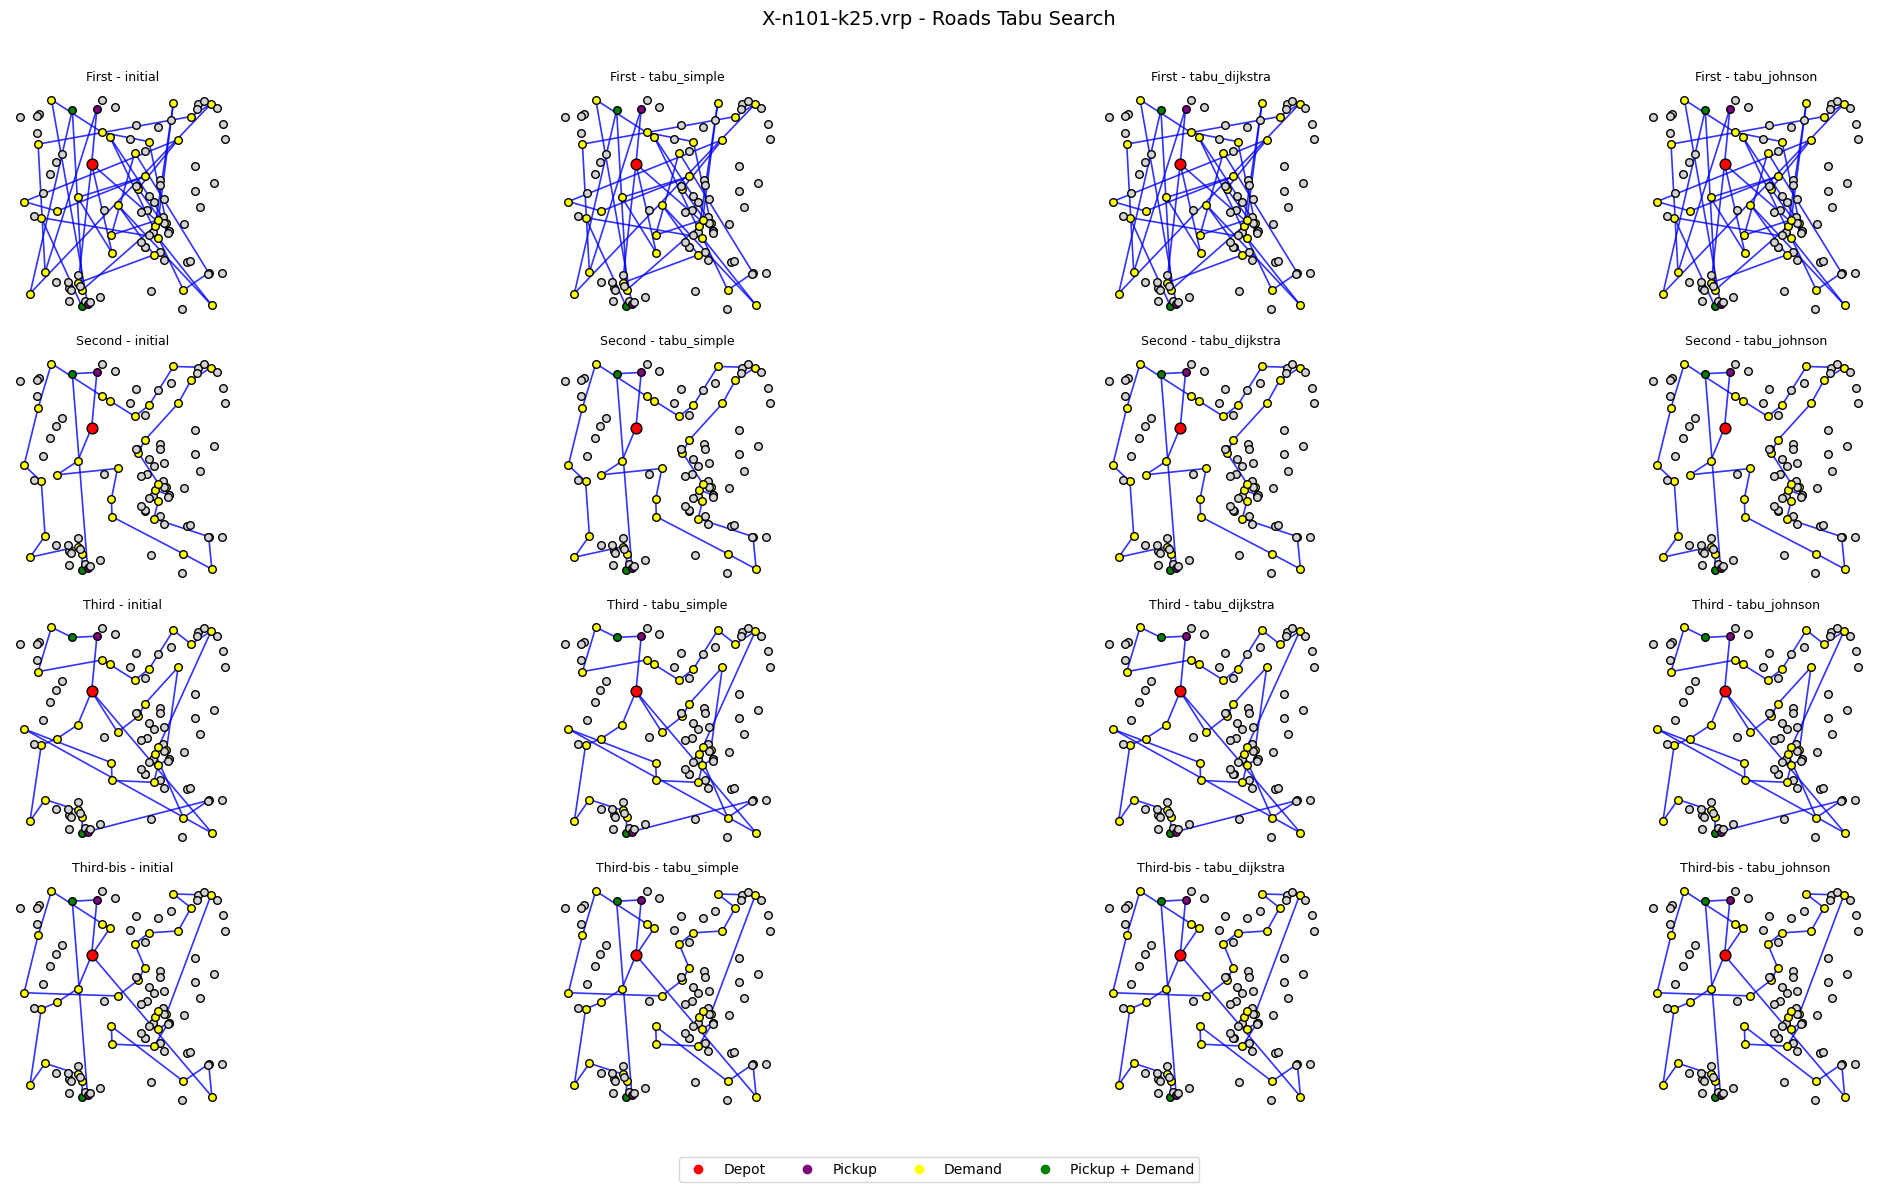

In [90]:
for counter in range(len(INSTANCES)):
    coords, graph, pickups, demands, results, base, total = run_instance_experiments(INSTANCES[counter], seed=RANDOM_SEED)
    approaches = ["First", "Second", "Third", "Third-bis"]

    plot_all_routes(coords, depot=1, pickups=pickups, demands=demands,
                    results=results, approaches=approaches, algos=["initial","tabu_simple", "tabu_dijkstra", "tabu_johnson"],
                    title_prefix=os.path.basename(INSTANCES[counter]))

## 13. Experiment Results and Interpretation

### 13.1. Reading the printed results

For each instance (e.g., `A-n32-k5` and `X-n101-k25`), the program first loads and analyzes the problem, then prints key information:

- **Pickup route / Delivery route:**  
  The sequence of nodes visited during the pickup and delivery phases.

- **Pickup / Delivery / Total distance:**  
  The total Euclidean distance traveled in each phase and overall.

- **Theoretical minimum (lower bound):**  
  A safe reference distance assuming no pickup–delivery constraints — this acts as a best possible (unconstrained) baseline.

- **Approach results:**  
  For each construction heuristic (*First*, *Second*, *Third*, *Third-bis*), the program prints:  
  - the route length (number of visited nodes),  
  - the *pure distance* (raw total length before Tabu Search),  
  - and results of three Tabu Search variants:  
    - **Tabu (simple):** neighborhood search using direct distances,  
    - **Tabu + Dijkstra:** dynamically computed shortest paths,  
    - **Tabu + Johnson:** precomputed all-pairs shortest paths.  

Each method’s **distance and computation time** allow comparing efficiency and quality across variants.

---

### 13.2. Reading the route plots

Between the two printed blocks, the notebook shows one **graph per approach**.  
Each graph visualizes:
- The depot, pickup points, and customer nodes (colored as indicated in the legend).  
- The route drawn as connected lines showing the visiting order.

These visualizations make it easy to see whether the route is compact or involves unnecessary detours.  
Since each plot already includes a legend, you can directly match colors to node roles (e.g., depot, pickups, customers).

---

### 13.3. Why the Second approach is nearly identical to the Simplex lower bound

Your **Second approach** and the **Simplex reference method** follow almost the same logic:

1. Both first collect all object types (one pickup per type).  
2. Then, they start the delivery phase to serve all customers from the last pickup.  
3. Both optionally apply a 2-opt improvement to minimize travel distance.

Because of this shared structure, their total distances are almost identical.  
The small observed differences (a few units at most) come from:

- **Floating-point rounding:** minor numerical differences in Euclidean distance calculations.  
- **Tie-breaking in nearest-neighbor selection:** when two nodes are equally close, Python’s iteration order can slightly change the chosen node.  

In practice, these variations are negligible — they only reflect tiny computational details, not a conceptual difference in the heuristic.

---

### 13.4. Key takeaway

- The **Second approach** effectively reproduces the **Simplex baseline** while being simpler to implement.  
- The **First** and **Third** variants explore other route structures but are generally less efficient in total distance.  
- The **Tabu Search results** show no improvement over the initial “pure” versions, indicating that the constructed routes were already well optimized within their respective heuristics.  
- The **graph visualizations** confirm that the Second approach produces the most compact and balanced routes, closely matching the theoretical optimum.

# Part C : Experimental study

## 1. Performance Visualization and Comparison

This section visualizes and compares the performance of different routing approaches and Tabu search variants. It includes:

- Bar charts for total distances (`plot_distance_histogram`)  
- Bar charts for computation times (`plot_time_histogram`)  
- Performance ratios compared to the Simplex (`plot_ratio_histogram`)  
- Scatter plots showing distance vs execution time (`plot_distance_vs_time`)  
- Color-coded legends for approaches and reference bounds

In [91]:
APPROACH_COLORS = {
    "First": "#1f77b4",      # blue
    "Second": "#ff7f0e",     # orange
    "Third": "#2ca02c",      # green
    "Third-bis": "#9467bd"   # purple
}

def show_legend(include_bound=True):
    handles = [plt.Rectangle((0,0),1,1, color=c) for c in APPROACH_COLORS.values()]
    labels = list(APPROACH_COLORS.keys())

    if include_bound:
        handles.append(plt.Line2D([0], [0], color='black', linestyle='--', linewidth=2))
        labels.append("Simplex base")
        handles.append(plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2))
        labels.append("Simplex")

    plt.legend(handles, labels, title="Approaches", loc='upper right')


def plot_distance_histogram(results, distance_simplex_base, distance_simplex):
    labels = []
    distances = []
    colors = []

    for (approach, method), (dist, _, _) in results.items():
        if isinstance(dist, (int, float)):
            labels.append(f"{approach}\n{method.replace('tabu_', '')}")
            distances.append(dist)
            base_color = APPROACH_COLORS.get(approach, "gray")
            alpha = 0.9 if "simple" in method else 0.7 if "dijkstra" in method else 0.5
            colors.append((*mcolors.to_rgba(base_color)[:3], alpha))

    x = np.arange(len(labels))
    plt.figure(figsize=(12, 6))
    plt.bar(x, distances, color=colors, edgecolor='black')

    # Simplex base
    plt.axhline(distance_simplex_base, color='black', linestyle='--', linewidth=2)
    # Simplex
    plt.axhline(distance_simplex, color='red', linestyle='--', linewidth=2)

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylabel("Total distance")
    plt.title("Comparison of total distances by approach")
    show_legend(include_bound=True)
    plt.tight_layout()
    plt.show()


def plot_time_histogram(results):
    labels = []
    times = []
    colors = []

    for (approach, method), (dist, t, _) in results.items():
        if isinstance(t, (int, float)):
            labels.append(f"{approach}\n{method.replace('tabu_', '')}")
            times.append(t)
            base_color = APPROACH_COLORS.get(approach, "gray")
            alpha = 0.9 if "simple" in method else 0.7 if "dijkstra" in method else 0.5
            colors.append((*mcolors.to_rgba(base_color)[:3], alpha))

    x = np.arange(len(labels))
    plt.figure(figsize=(12, 6))
    plt.bar(x, times, color=colors, edgecolor='black')

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylabel("Execution time (s)")
    plt.title("Comparison of computation times by approach and method")
    show_legend(include_bound=False)  # no bound line here
    plt.tight_layout()
    plt.show()


def plot_ratio_histogram(results, distance_simplex):
    labels = []
    ratios = []
    colors = []

    for (approach, method), (dist, _, _) in results.items():
        if isinstance(dist, (int, float)) and distance_simplex > 0:
            ratio = distance_simplex / dist
            labels.append(f"{approach}\n{method.replace('tabu_', '')}")
            ratios.append(ratio)
            base_color = APPROACH_COLORS.get(approach, "gray")
            alpha = 0.9 if "simple" in method else 0.7 if "dijkstra" in method else 0.5
            colors.append((*mcolors.to_rgba(base_color)[:3], alpha))

    x = np.arange(len(labels))
    plt.figure(figsize=(12, 6))
    plt.bar(x, ratios, color=colors, edgecolor='black')

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylabel("Ratio (Simplex / solution)")
    plt.title("Performance ratio compared to the Simplex")
    show_legend(include_bound=False)
    plt.tight_layout()
    plt.show()


def plot_distance_vs_time(results, distance_simplex_base=None, distance_simplex=None):
    """
    Plot a scatter chart comparing total distance vs computation time
    for all approaches and methods.
    """
    plt.figure(figsize=(10, 6))
    
    for (approach, method), (dist, t, _) in results.items():
        if isinstance(dist, (int, float)) and isinstance(t, (int, float)):
            base_color = APPROACH_COLORS.get(approach, "gray")
            alpha = 0.9 if "simple" in method else 0.7 if "dijkstra" in method else 0.5
            color = (*mcolors.to_rgba(base_color)[:3], alpha)
            plt.scatter(t, dist, color=color, s=120, edgecolor='black', label=approach)
            plt.text(t * 1.01, dist, f"{approach}\n{method.replace('tabu_', '')}",
                     fontsize=9, ha='left', va='center')
    
    if distance_simplex_base is not None:
        # Simplex base
        plt.axhline(distance_simplex_base, color='black', linestyle='--', linewidth=2)
        # Simplex
        plt.axhline(distance_simplex, color='red', linestyle='--', linewidth=2)

    plt.xlabel("Execution time (s)")
    plt.ylabel("Total distance")
    plt.title("Distance vs Execution Time for All Approaches")
        
    plt.grid(True, linestyle='--', alpha=0.6)
    show_legend(include_bound=True)
    plt.tight_layout()
    plt.show()

### 2. Experimental Results Visualization

For each instance in `INSTANCES`, this loop:

1. Runs the experiments to compute initial routes and Tabu search results.  
2. Generates visualizations to compare approaches and methods:
   - Total distances (bar chart)
   - Computation times (bar chart)
   - Performance ratios vs Simplex (bar chart)
   - Distance vs execution time (scatter plot)


Loaded instance instances/A-n32-k5.vrp nodes: 32 depot: 1
Num customers (with demand): 13
Pickup route (stop at last pickup): [31, 24, 9, 16]
Pickup distance: 157.7635276004817
Delivery route (start at last pickup, end depot): [23, 5, 29, 9, 19, 6, 21, 28, 18, 17, 31, 1]
Delivery distance: 348.4547558177097
Total combined distance: 506.2182834181914
Johnson time (all-pairs Dijkstra): 0.0017986297607421875 s

Theoretical minimum distance (safe bound, unconstrained problem): 298.54641577097766
--- Approach: First
Initial route length (nodes): 14
Pure distance: 977.96
Tabu (simple) distance: 977.96 time: 0.0
Tabu + Dijkstra distance: 977.96 time: 0.0
Tabu + Johnson distance: 977.96 time: 0.0
--- Approach: Second
Initial route length (nodes): 14
Pure distance: 501.46
Tabu (simple) distance: 501.46 time: 0.0
Tabu + Dijkstra distance: 501.46 time: 0.0
Tabu + Johnson distance: 501.46 time: 0.0
--- Approach: Third
Initial route length (nodes): 14
Pure distance: 522.2
Tabu (simple) distance: 5

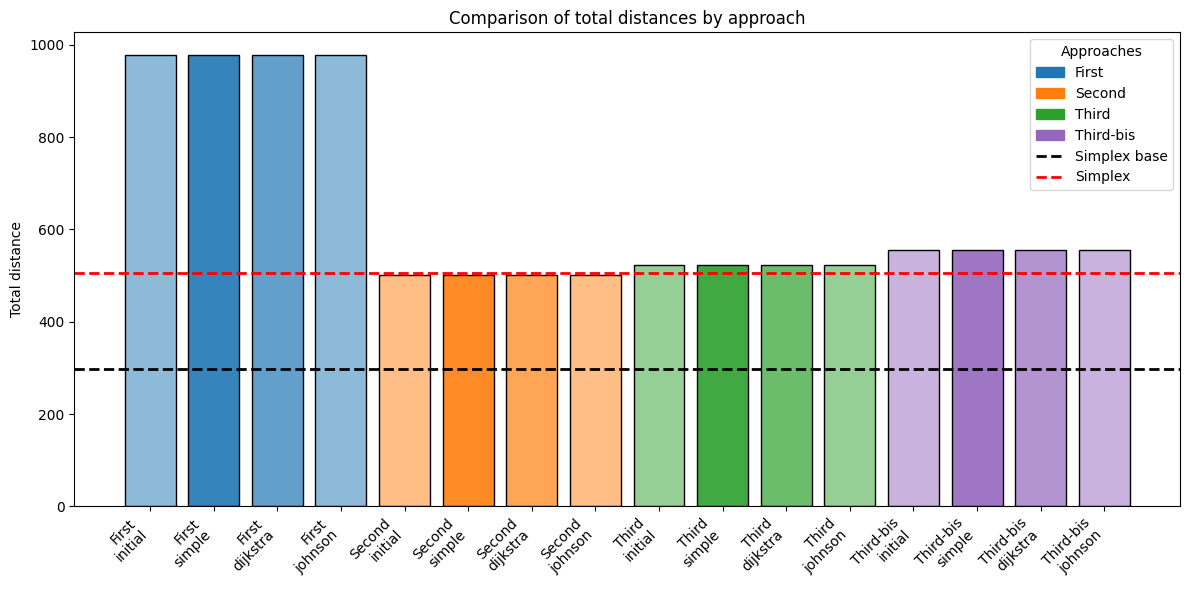

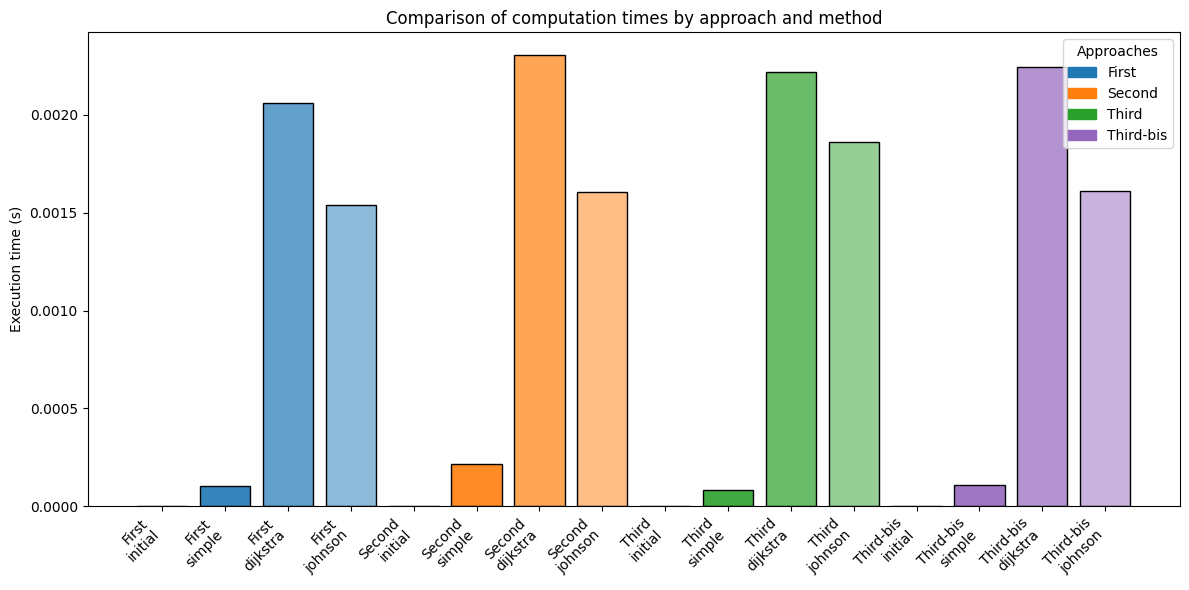

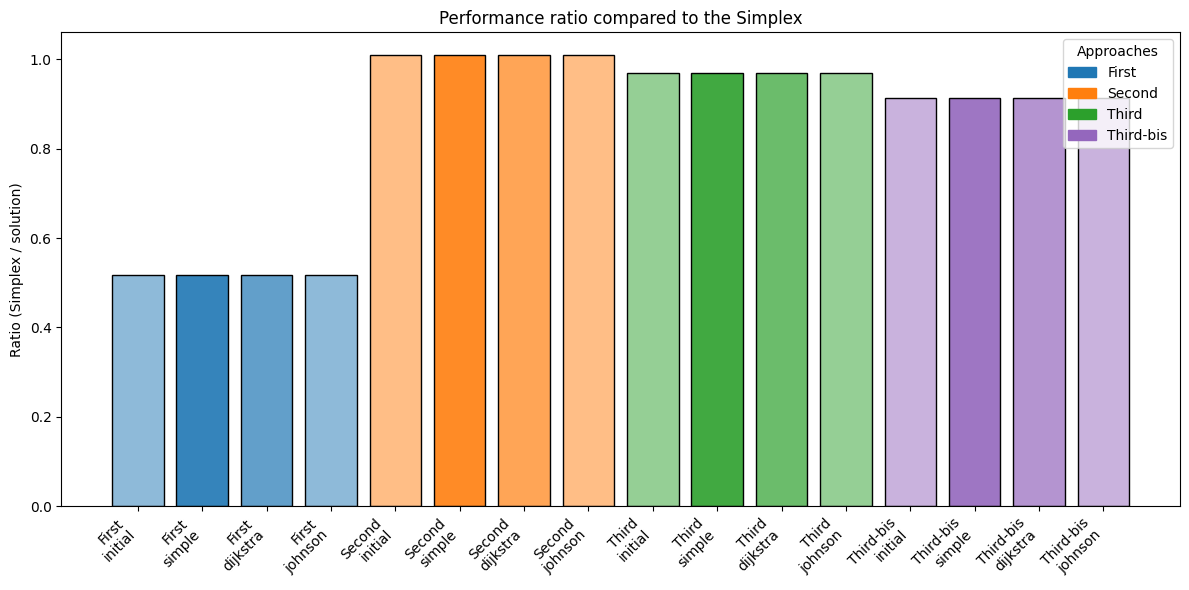

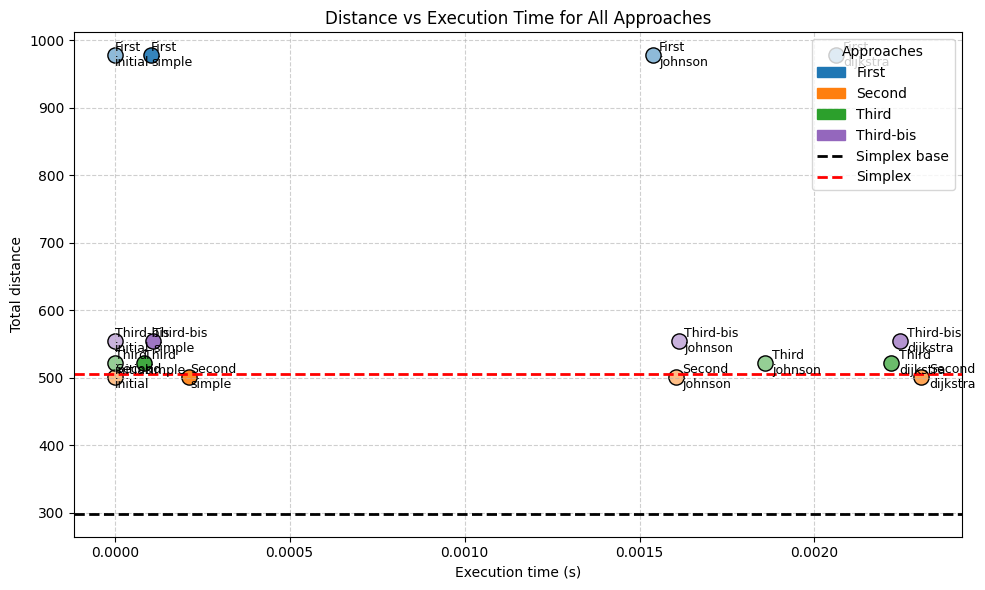


Loaded instance instances/X-n101-k25.vrp nodes: 101 depot: 1
Num customers (with demand): 35
Pickup route (stop at last pickup): [31, 76, 70, 17]
Pickup distance: 1323.306166386595
Delivery route (start at last pickup, end depot): [77, 85, 71, 2, 23, 21, 32, 94, 76, 80, 51, 22, 62, 82, 63, 53, 28, 9, 35, 89, 61, 58, 78, 29, 66, 30, 46, 50, 5, 19, 59, 16, 6, 1]
Delivery distance: 5037.055020841313
Total combined distance: 6360.361187227908
Johnson time (all-pairs Dijkstra): 0.047331809997558594 s

Theoretical minimum distance (safe bound, unconstrained problem): 5378.468794855397
--- Approach: First
Initial route length (nodes): 37
Pure distance: 18500.53
Tabu (simple) distance: 18500.53 time: 0.0
Tabu + Dijkstra distance: 18500.53 time: 0.06
Tabu + Johnson distance: 18500.53 time: 0.05
--- Approach: Second
Initial route length (nodes): 37
Pure distance: 6359.16
Tabu (simple) distance: 6359.16 time: 0.0
Tabu + Dijkstra distance: 6359.16 time: 0.07
Tabu + Johnson distance: 6359.16 time:

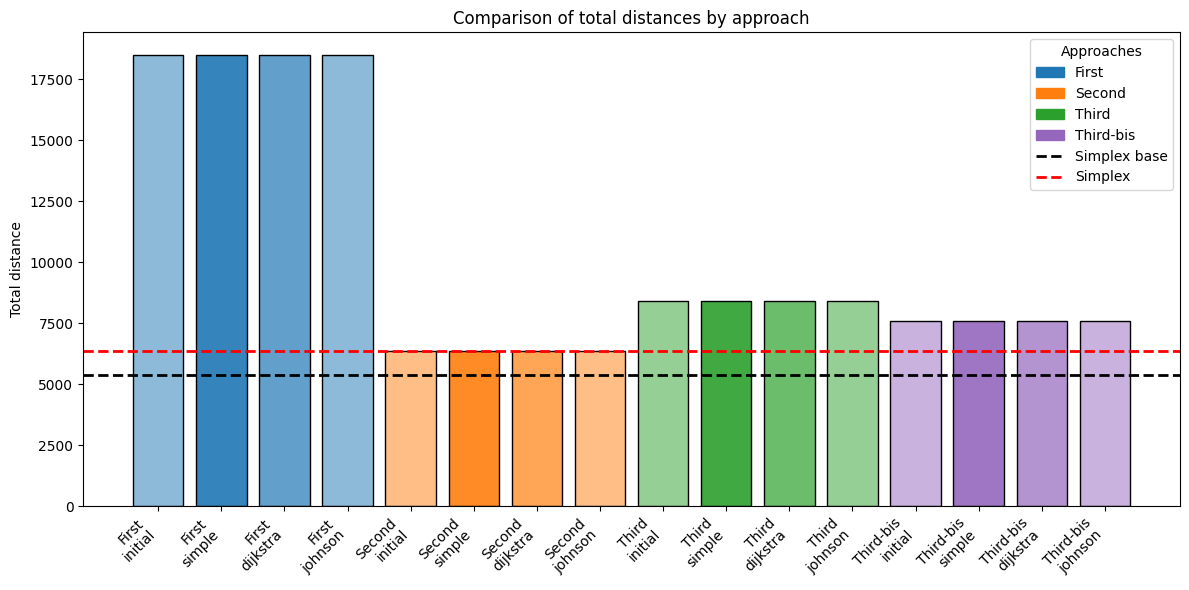

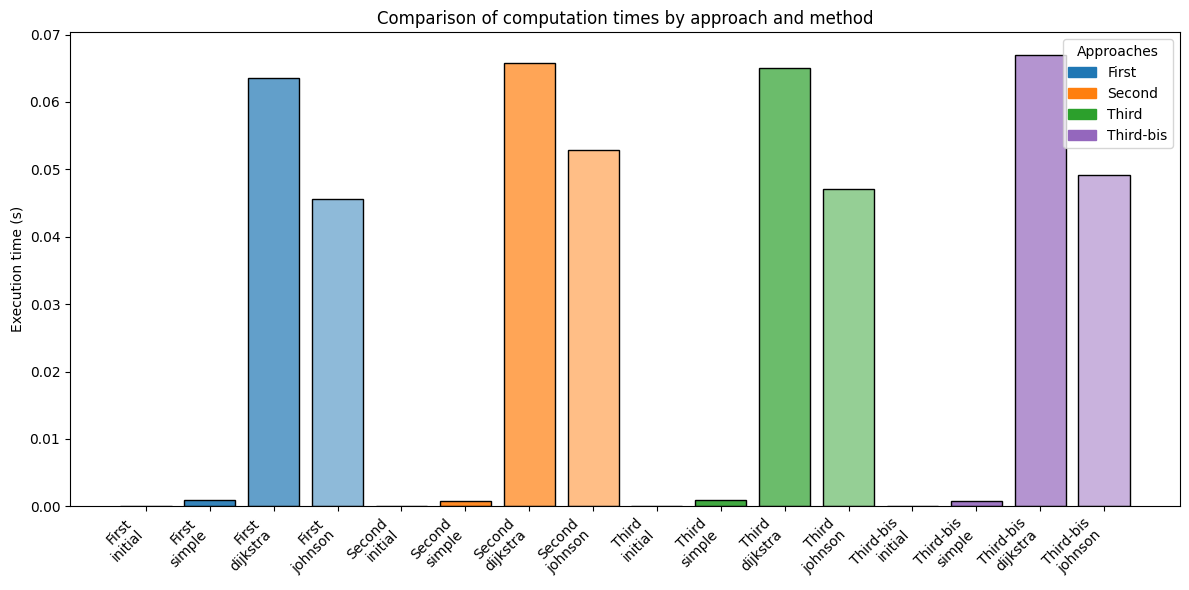

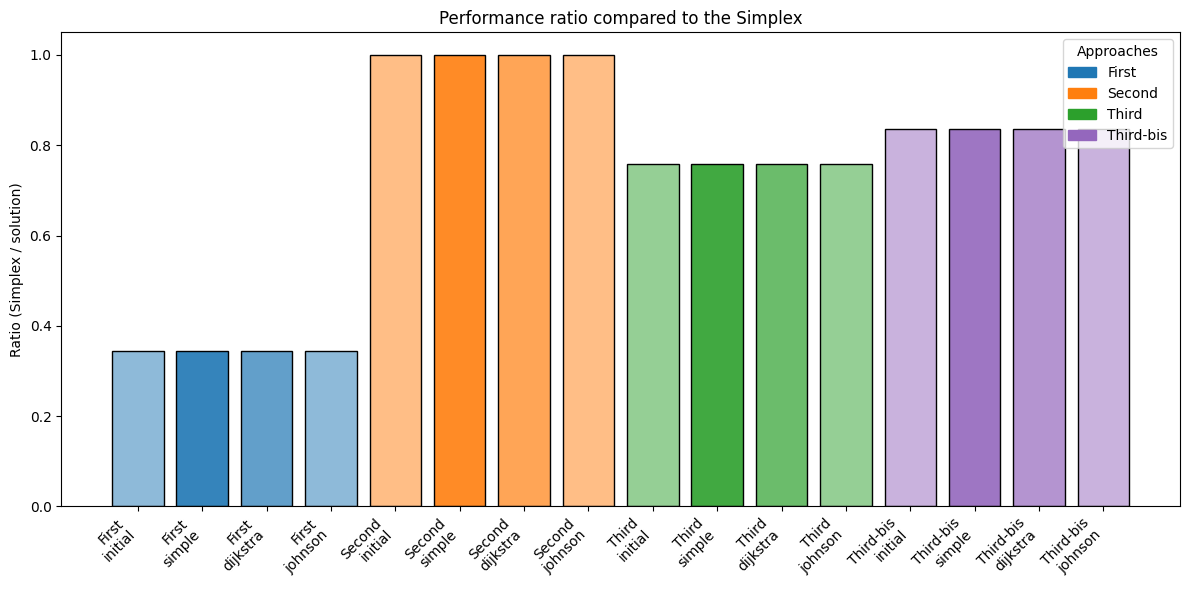

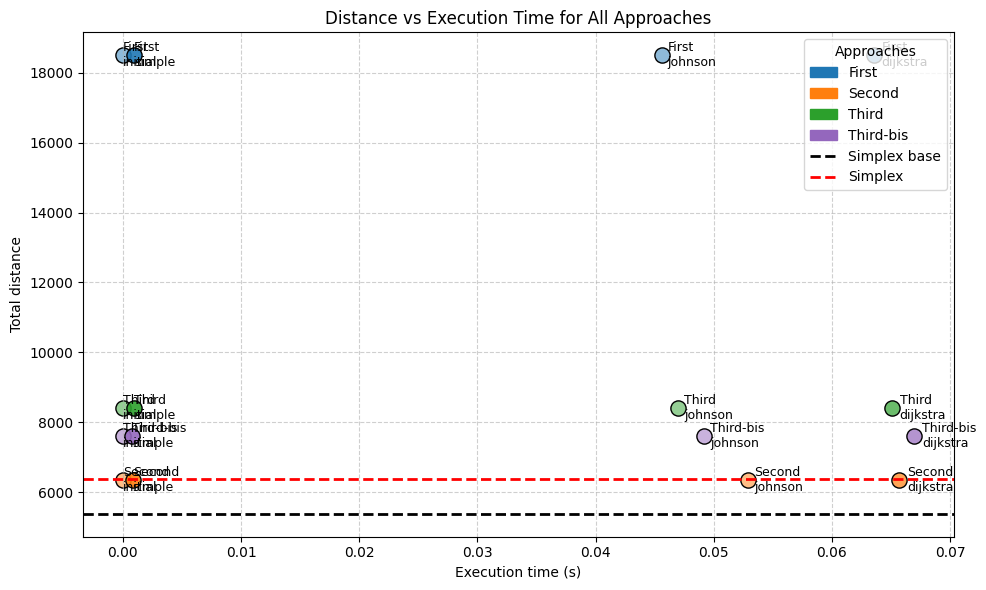

In [92]:
for counter in range(len(INSTANCES)):
    coords, graph, pickups, demands, results, base, total = run_instance_experiments(INSTANCES[counter], seed=RANDOM_SEED)
    approaches = ["First", "Second", "Third", "Third-bis"]

    plot_distance_histogram(results, base, total)
    plot_time_histogram(results)
    plot_ratio_histogram(results, total)
    plot_distance_vs_time(results, base, total)

## 3. Gap Analysis vs Simplex

The code below computes and visualizes the **percentage gap of each approach/method compared to the Simplex solution**:

1. `compute_gaps(results, simplex)` calculates the % difference between each solution's distance and the Simplex distance.  
2. `plot_gap_histogram(gaps)` creates a bar chart showing these gaps, color-coded by approach, allowing quick comparison of how close each method is to the optimal/simplex reference.

In [93]:
def compute_gaps(results, simplex):
    """
    Compute the percentage gap between each approach and the simplex.
    Returns a dict: {(approach, method): gap_percent}
    """
    gaps = {}
    for (approach, method), (dist, _, _) in results.items():
        if isinstance(dist, (int, float)) and simplex > 0:
            gap = ((dist - simplex) / simplex) * 100
            gaps[(approach, method)] = gap
    return gaps


def plot_gap_histogram(gaps):
    """
    Plot a bar chart of the % gap between each approach/method and the simplex.
    """
    labels = []
    values = []
    colors = []

    for (approach, method), gap in gaps.items():
        labels.append(f"{approach}\n{method.replace('tabu_', '')}")
        values.append(gap)
        base_color = APPROACH_COLORS.get(approach, "gray")
        alpha = 0.9 if "simple" in method else 0.7 if "dijkstra" in method else 0.5
        colors.append((*mcolors.to_rgba(base_color)[:3], alpha))
    
    x = np.arange(len(labels))
    plt.figure(figsize=(12, 6))
    plt.bar(x, values, color=colors, edgecolor='black')
    plt.axhline(0, color='black', linewidth=1)

    plt.xticks(x, labels, rotation=45, ha='right')
    plt.ylabel("Gap (%)")
    plt.title("Gap vs Simplex (percentage difference)")
    show_legend(include_bound=False)
    plt.tight_layout()
    plt.show()

### 4. Compute and Visualize Gaps per Instance

For each instance in `INSTANCES`, this loop:

1. Runs experiments to obtain results for all approaches and methods.  
2. Computes the percentage gap of each approach/method relative to the Simplex solution.  
3. Plots a bar chart of these gaps for visual comparison.  
4. Prints the numerical gap values in the console for reference.



Loaded instance instances/A-n32-k5.vrp nodes: 32 depot: 1
Num customers (with demand): 13
Pickup route (stop at last pickup): [31, 24, 9, 16]
Pickup distance: 157.7635276004817
Delivery route (start at last pickup, end depot): [23, 5, 29, 9, 19, 6, 21, 28, 18, 17, 31, 1]
Delivery distance: 348.4547558177097
Total combined distance: 506.2182834181914
Johnson time (all-pairs Dijkstra): 0.0016293525695800781 s

Theoretical minimum distance (safe bound, unconstrained problem): 298.54641577097766
--- Approach: First
Initial route length (nodes): 14
Pure distance: 977.96
Tabu (simple) distance: 977.96 time: 0.0
Tabu + Dijkstra distance: 977.96 time: 0.0
Tabu + Johnson distance: 977.96 time: 0.0
--- Approach: Second
Initial route length (nodes): 14
Pure distance: 501.46
Tabu (simple) distance: 501.46 time: 0.0
Tabu + Dijkstra distance: 501.46 time: 0.0
Tabu + Johnson distance: 501.46 time: 0.0
--- Approach: Third
Initial route length (nodes): 14
Pure distance: 522.2
Tabu (simple) distance: 5

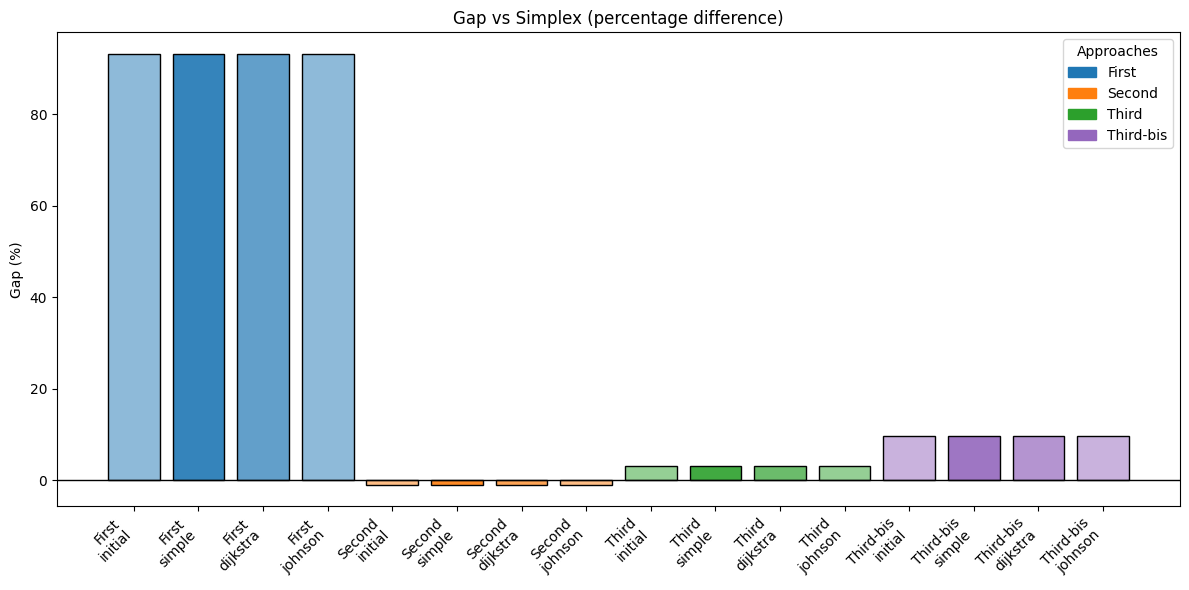

First      initial         → 93.19%
First      tabu_dijkstra   → 93.19%
First      tabu_johnson    → 93.19%
First      tabu_simple     → 93.19%
Second     initial         → -0.94%
Second     tabu_dijkstra   → -0.94%
Second     tabu_johnson    → -0.94%
Second     tabu_simple     → -0.94%
Third      initial         → 3.16%
Third      tabu_dijkstra   → 3.16%
Third      tabu_johnson    → 3.16%
Third      tabu_simple     → 3.16%
Third-bis  initial         → 9.62%
Third-bis  tabu_dijkstra   → 9.62%
Third-bis  tabu_johnson    → 9.62%
Third-bis  tabu_simple     → 9.62%

Loaded instance instances/X-n101-k25.vrp nodes: 101 depot: 1
Num customers (with demand): 35
Pickup route (stop at last pickup): [31, 76, 70, 17]
Pickup distance: 1323.306166386595
Delivery route (start at last pickup, end depot): [77, 85, 71, 2, 23, 21, 32, 94, 76, 80, 51, 22, 62, 82, 63, 53, 28, 9, 35, 89, 61, 58, 78, 29, 66, 30, 46, 50, 5, 19, 59, 16, 6, 1]
Delivery distance: 5037.055020841313
Total combined distance: 6360.3

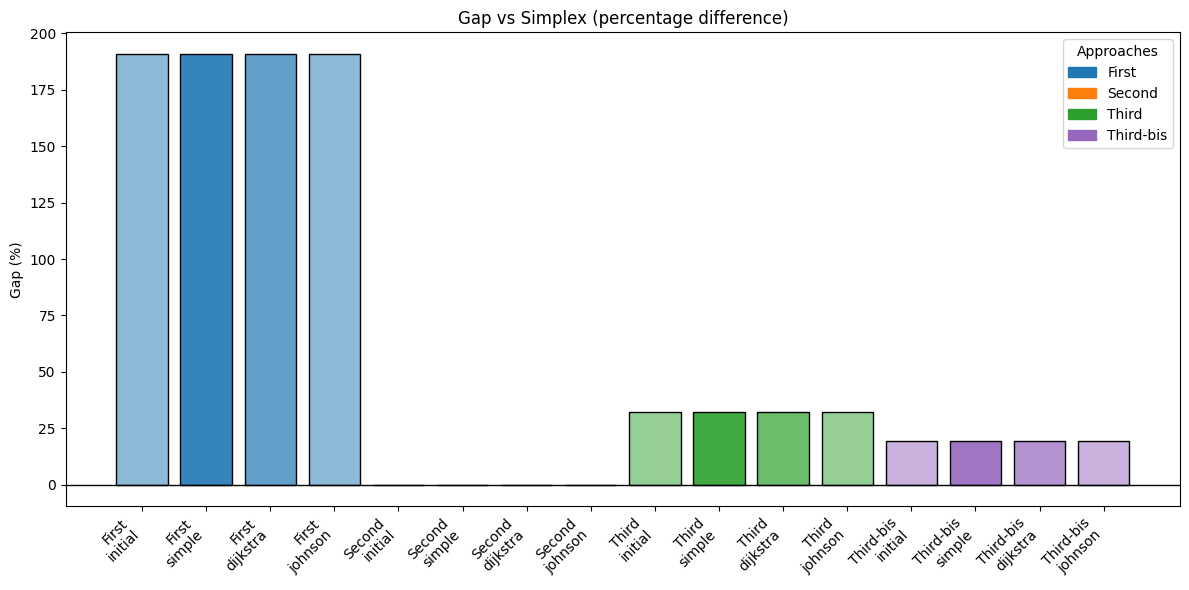

First      initial         → 190.87%
First      tabu_dijkstra   → 190.87%
First      tabu_johnson    → 190.87%
First      tabu_simple     → 190.87%
Second     initial         → -0.02%
Second     tabu_dijkstra   → -0.02%
Second     tabu_johnson    → -0.02%
Second     tabu_simple     → -0.02%
Third      initial         → 32.02%
Third      tabu_dijkstra   → 32.02%
Third      tabu_johnson    → 32.02%
Third      tabu_simple     → 32.02%
Third-bis  initial         → 19.58%
Third-bis  tabu_dijkstra   → 19.58%
Third-bis  tabu_johnson    → 19.58%
Third-bis  tabu_simple     → 19.58%


In [94]:
for counter in range(len(INSTANCES)):
    coords, graph, pickups, demands, results, base, total = run_instance_experiments(INSTANCES[counter], seed=RANDOM_SEED)

    gaps = compute_gaps(results, total)
    plot_gap_histogram(gaps)

    # Display the gaps in the console
    for (approach, method), gap in sorted(gaps.items()):
        print(f"{approach:10s} {method:15s} → {gap:.2f}%")

## 5. Generating a Random VRPLIB Instance

This function creates a **synthetic VRPLIB-like file** for testing.  

It randomly generates:
1. A **header** following the VRPLIB format (name, type, capacity, etc.).  
2. **Node coordinates** for all locations (including the depot).  
3. **Demand values** for each customer (0 for the depot).  
4. A **depot section** marking node 1 as the depot.  

The result is a complete VRPLIB instance text that can be saved or used directly in experiments.

In [95]:
def generate_vrplib_instance(name="New_Instance", num_nodes=32, max_coord=100, max_demand=25, capacity=100, seed=None):
    """
    Generates a VRPLIB-like instance (text) containing:
        - A header conforming to the VRPLIB format
        - A section of random coordinates
        - A section of random requests
        - A repository (node ​​1 by default)
    Args:
        name (str): instance name (e.g., "A-n32-k5")
        num_nodes (int): total number of nodes
        max_coord (int): maximum coordinate (x, y ∈ [1, max_coord])
        max_demand (int): maximum demand per customer
        capacity (int): vehicle capacity (decorative information)
        seed (int, optional): for reproducibility
    Returns:
        str: complete contents of the VRPLIB instance
    """
    if seed is not None:
        random.seed(seed)
    
    # --- Header ---
    header = textwrap.dedent(f"""\
        NAME : {name}
        COMMENT : (Generated instance, {num_nodes} nodes)
        TYPE : CVRP
        DIMENSION : {num_nodes}
        EDGE_WEIGHT_TYPE : EUC_2D
        CAPACITY : {capacity}
        NODE_COORD_SECTION
    """)
    
    # --- Coordinates ---
    coords = []
    for i in range(1, num_nodes + 1):
        x = random.randint(1, max_coord)
        y = random.randint(1, max_coord)
        coords.append(f" {i} {x} {y}")
    
    # --- Demands ---
    demands = []
    for i in range(1, num_nodes + 1):
        demand = 0 if i == 1 else random.randint(1, max_demand)
        demands.append(f"{i} {demand}")
    
    # --- Depot section ---
    depot_section = textwrap.dedent("""\
        DEPOT_SECTION
         1
         -1
        EOF
    """)
    
    # --- Combine everything ---
    instance_text = (
        header
        + "\n".join(coords)
        + "\nDEMAND_SECTION\n"
        + "\n".join(demands)
        + "\n"
        + depot_section
    )
    
    return instance_text

## 6. Building a k-Nearest Neighbor Graph

This function constructs an **incomplete graph** where each node is connected only to its **k closest neighbors** based on Euclidean distance.

Steps:
1. Compute distances between each pair of nodes.  
2. For each node, keep connections to its *k nearest neighbors*.  
3. Ensure connections are **symmetric** (if A → B, then B → A).  
4. Remove duplicate edges for a clean adjacency structure.

The result is a sparse, spatially coherent graph, useful for approximations or large-scale VRP problems.

In [96]:
def build_k_nearest_graph(coords, k=5):
    """
    Constructs an incomplete graph based on the k nearest neighbors.
    Each node is connected to its k nearest neighbors (symmetrically).
    Args:
        coords(dict): {node: (x, y)}
        k(int): number of nearest neighbors to connect
    Returns:
        dict: {node: [(neighbor, distance), ...]}
    """
    nodes = list(coords.keys())
    n = len(nodes)
    graph = {i: [] for i in nodes}

    for i in range(n):
        ni = nodes[i]
        xi, yi = coords[ni]
        distances = []

        # Calculate the distances to all the others
        for j in range(n):
            if i == j:
                continue
            nj = nodes[j]
            xj, yj = coords[nj]
            dist = math.hypot(xj - xi, yj - yi)
            distances.append((dist, nj))

        # Select the k nearest neighbors
        k_nearest = heapq.nsmallest(k, distances, key=lambda x: x[0])

        # Add the edges
        for dist, neighbor in k_nearest:
            graph[ni].append((neighbor, dist))
            graph[neighbor].append((ni, dist))  # symmetrical

    # Clean up any duplicates
    for node in graph:
        seen = set()
        unique_edges = []
        for neighbor, dist in graph[node]:
            if neighbor not in seen:
                unique_edges.append((neighbor, dist))
                seen.add(neighbor)
        graph[node] = unique_edges

    return graph


## 7. Running a Complete VRP Instance (Pure Version)

This function executes the **full process** for a Vehicle Routing Problem (VRP) instance without Tabu optimization.

Steps:
1. **Load instance data** – parse coordinates and identify the depot.  
2. **Build the graph** – using a *k-nearest neighbor* approach for connectivity.  
3. **Generate pickups and demands** – randomly assign pickup and delivery requirements.  
4. **Compute all-pairs shortest paths** – with Johnson’s algorithm for efficient distance lookup.  
5. **Run the simplex two-phase method** – to obtain optimized pickup and delivery routes.  
6. **Evaluate each heuristic approach** (First, Second, Third, Third-bis):  
   - Generate an initial route.  
   - Compute the total route distance using the raw graph.  
7. **Return results** – including coordinates, graph, generated data, and computed distances.

This forms the baseline experimental pipeline before applying more advanced optimization methods like Tabu Search.

In [97]:
def run_instance_pure(instance_filename, k, seed=0):
    coords, depot = parse_vrp_coords(instance_filename)
    nodes = sorted(coords.keys())
    print(f"\nLoaded instance {instance_filename} nodes: {len(nodes)} depot: {depot}")

    graph = build_k_nearest_graph(coords, k=k)

    pickups, demands = generate_pickups_and_demands(nodes, num_types=NUM_TYPES, seed=seed)
    customers = customers_from_demands(demands)
    print(f"Num customers (with demand): {len(customers)}")
    

    t0 = time.time()
    distances_johnson = johnson_all_pairs(graph)
    t_johnson = time.time() - t0
    print(f"Johnson time (all-pairs Dijkstra): {t_johnson} s\n")

    results = {}
    approaches = {
    "First": lambda: initial_route_first_approach(nodes, pickups, demands, NUM_TYPES, coords),
    "Second": lambda: initial_route_second_approach(nodes, pickups, demands, NUM_TYPES, coords),
    "Third": lambda: initial_route_third_approach(nodes, pickups, demands, NUM_TYPES, depot, coords),
    "Third-bis": lambda: initial_route_third_bis(nodes, pickups, demands, NUM_TYPES, depot, coords)
    }

    pickup_route, pickup_dist, delivery_route, delivery_dist, total = simplex_two_phase(
    depot=depot,
    pickups=pickups,
    demands=demands,
    graph=graph,
    coords=coords,
    improve=True
    )
    
    print("Pickup route (stop at last pickup):", pickup_route)
    print("Pickup distance:", pickup_dist)
    print("Delivery route (start at last pickup, end depot):", delivery_route)
    print("Delivery distance:", delivery_dist)
    print("Total combined distance:", total)


    for approach_name, ctor in approaches.items():
        print(f"--- Approach: {approach_name}")
        init_route = list(dict.fromkeys(ctor()))  # remove duplicates but keep order
        print(f"Initial route length (nodes): {len(init_route)}")

        if len(init_route) == 0:
            print("No customers to serve for this approach.")
            continue

        # Pure 
        pure_distance = 0
        full_route = [depot] + init_route + [depot]
        for a, b in zip(full_route[:-1], full_route[1:]):
            for v, w in graph[a]:
                if v == b:
                    pure_distance += w
                    break
        print(f"Pure distance: {round(pure_distance,2)}")
        results[(approach_name, "initial")] = (pure_distance, 0, init_route)            

    return coords, graph, pickups, demands, results, total

## 8. Visualizing the VRP Graph Structure

This function displays the **actual (possibly incomplete) VRP graph**:

1. Plots nodes using coordinates, color-coded by type:
   - Red: depot
   - Purple: pickup nodes
   - Yellow: demand nodes
   - Green: pickup + demand nodes
2. Draws the edges from the adjacency graph.
3. Optionally shows edge weights.
4. Includes a legend for node types and existing edges.

In [98]:
def plot_graph_structure(coords, graph, depot=1, pickups=None, demands=None, title="Graphe VRP (incomplete)", figsize=(10, 10), show_weights=False):
    """
    Displays the actual (incomplete) graph starting from the adjacency 'graph'.
    - coords: {node: (x, y)}
    - graph: {node: [(neighbor, weight), ...]}
    - depot: repository identifier
    - pickups/demands: dictionaries for coloring the nodes
    - show_weights: displays the weights on the edges
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title, fontsize=14)
    ax.set_aspect("equal")
    ax.axis("off")

    pickups = pickups or {}
    demands = demands or {}
    all_pickups = set().union(*pickups.values()) if pickups else set()

    # --- Node colors ---
    node_colors = {}
    for node in coords.keys():
        if node == depot:
            node_colors[node] = "red"
        else:
            is_pickup = node in all_pickups
            is_demand = len(demands.get(node, set())) > 0
            if is_pickup and is_demand:
                node_colors[node] = "green"
            elif is_pickup:
                node_colors[node] = "purple"
            elif is_demand:
                node_colors[node] = "yellow"
            else:
                node_colors[node] = "lightgray"

    # --- Draw the existing edges of the graph ---
    drawn = set()  # avoid duplicates a-b and b-a
    for a, neighbors in graph.items():
        x1, y1 = coords[a]
        for b, w in neighbors:
            if b not in coords:
                continue
            key = tuple(sorted((a, b)))
            if key in drawn:
                continue
            drawn.add(key)
            x2, y2 = coords[b]
            ax.plot([x1, x2], [y1, y2], "-", color="lightblue", linewidth=0.9, alpha=0.7)
            if show_weights:
                xm, ym = (x1 + x2) / 2, (y1 + y2) / 2
                ax.text(xm, ym, f"{w:.1f}", fontsize=6, color="gray", alpha=0.7)

    # --- Trace the nodes ---
    for node, (x, y) in coords.items():
        ax.scatter(x, y, s=50 if node != depot else 80,
                   color=node_colors[node], edgecolors="black", zorder=3)

    # --- Legende ---
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Depot', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Pickup', markerfacecolor='purple', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Demand', markerfacecolor='yellow', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Pickup + Demand', markerfacecolor='green', markersize=8),
        Line2D([0], [0], color='lightblue', lw=2, label='Existing edges')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9, frameon=True)
    plt.tight_layout()
    plt.show()


## 9. Generating and Saving a Custom VRP Instance

In this section, a **synthetic VRP instance** is created and saved in the **VRPLIB format**.

1. **Generate a random instance** using `generate_vrplib_instance()`:
   - Defines the number of nodes, coordinate range, and demand limits.  
   - Ensures reproducibility with a random seed.  
2. **Preview the instance** – print the first 500 characters of the generated text to verify structure and content.  
3. **Save to file** – write the full instance to the `instances/` directory as `Generated.vrplib`.

This step allows testing and experimentation on a controlled, reproducible VRP dataset.

In [99]:
vrplib_text = generate_vrplib_instance(name="Generated", num_nodes=100, max_coord=100, max_demand=25, seed=RANDOM_SEED)

print(vrplib_text[:500])

with open("instances/Generated.vrplib", "w") as f:
    f.write(vrplib_text)

NAME : Generated
COMMENT : (Generated instance, 100 nodes)
TYPE : CVRP
DIMENSION : 100
EDGE_WEIGHT_TYPE : EUC_2D
CAPACITY : 100
NODE_COORD_SECTION
 1 31 76
 2 70 17
 3 48 78
 4 61 81
 5 75 9
 6 78 2
 7 61 34
 8 71 30
 9 25 92
 10 61 70
 11 71 61
 12 51 82
 13 20 30
 14 82 20
 15 67 50
 16 95 2
 17 86 100
 18 9 21
 19 98 76
 20 6 39
 21 100 4
 22 35 61
 23 77 93
 24 50 92
 25 55 51
 26 94 74
 27 57 18
 28 47 13
 29 5 18
 30 64 28
 31 34 87
 32 56 100
 33 81 39
 34 54 65
 35 50 74
 36 45 69
 37 75


## 10. Running and Visualizing the Generated Instance

In this part, the **generated VRP instance** is loaded, processed, and visualized.

1. **Load the instance** using `parse_vrp_coords()` to extract city coordinates and depot information.  
2. **Run experiments** with `run_instance_pure()`:
   - Builds a *k-nearest neighbor graph* (here, `k=10`) to represent city connections.  
   - Generates pickup and delivery data, runs initial routes, and computes total distances.  
3. **Connectivity check** – prints the number of edges and overall graph density.  
4. **Visualization** – displays the resulting graph structure with:
   - Red node → depot  
   - Purple → pickup  
   - Yellow → demand  
   - Green → both pickup and demand  
   - Light blue edges → k-nearest neighbor connections  

This provides an overview of the problem structure and validates that the generated instance and its graph are correctly built.


Loaded instance instances/Generated.vrplib nodes: 100 depot: 1
Num customers (with demand): 35
Johnson time (all-pairs Dijkstra): 0.011144638061523438 s

Pickup route (stop at last pickup): [31, 76, 17, 70]
Pickup distance: 163.1211187632633
Delivery route (start at last pickup, end depot): [30, 63, 62, 61, 51, 58, 77, 23, 17, 46, 19, 82, 59, 21, 16, 71, 6, 5, 78, 2, 28, 29, 53, 50, 66, 9, 32, 94, 76, 89, 35, 85, 80, 22, 1]
Delivery distance: 510.87530985988013
Total combined distance: 673.9964286231434
--- Approach: First
Initial route length (nodes): 37
Pure distance: 53.84
--- Approach: Second
Initial route length (nodes): 37
Pure distance: 320.63
--- Approach: Third
Initial route length (nodes): 37
Pure distance: 318.9
--- Approach: Third-bis
Initial route length (nodes): 37
Pure distance: 312.28
k-nearest graph : 100 knots, 599 edges, 12.1% connectivity


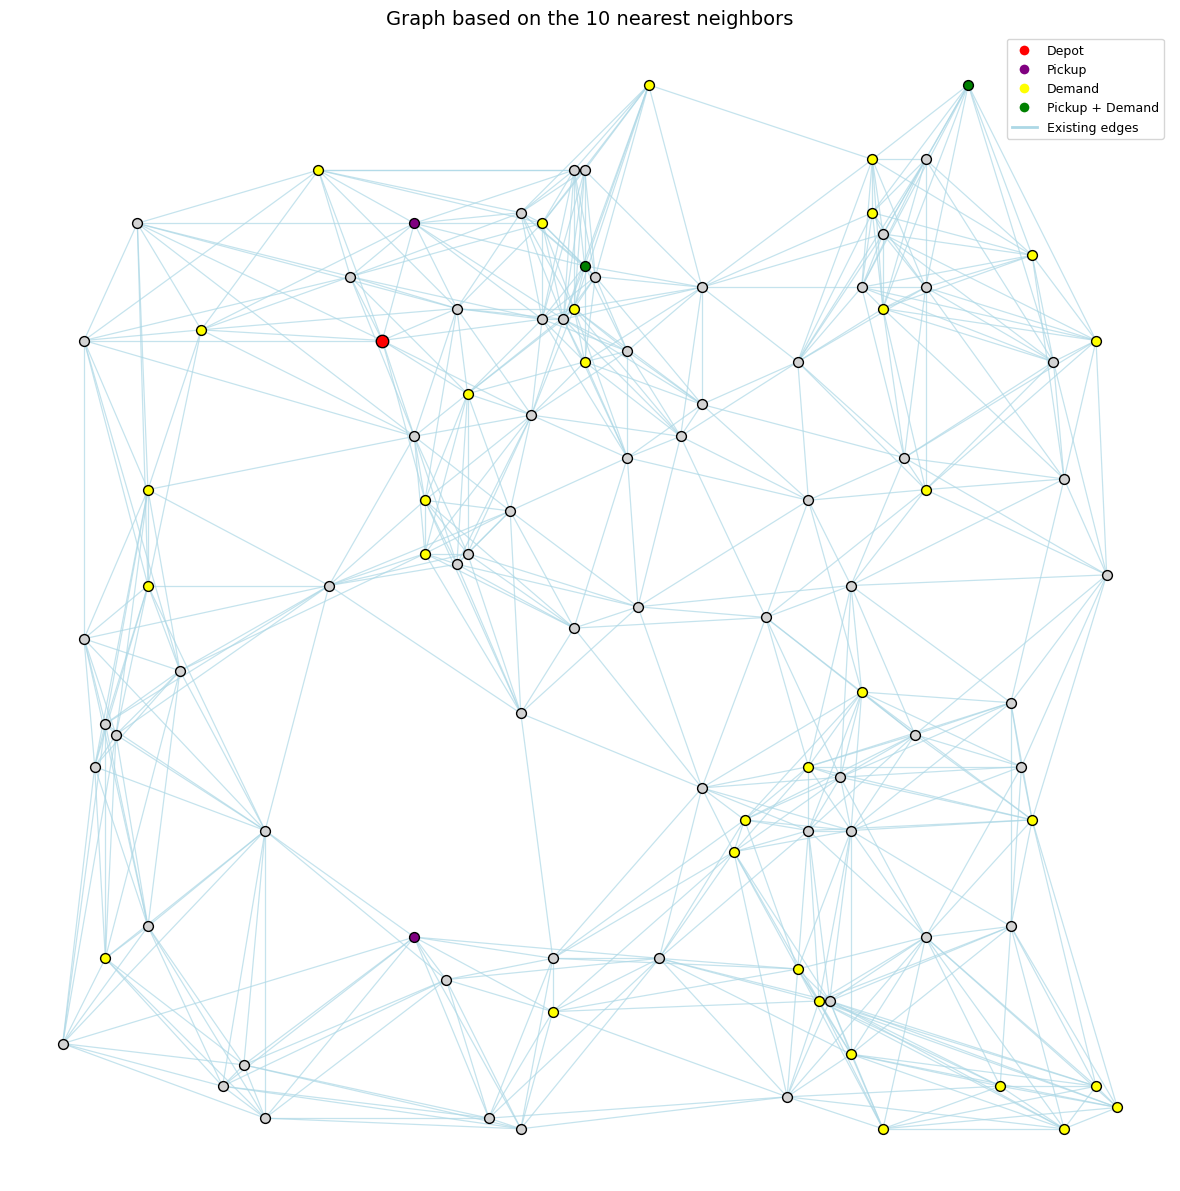

In [100]:
coords, depot = parse_vrp_coords("instances/Generated.vrplib")
coords, graph, pickups, demands, results, lb = run_instance_pure("instances/Generated.vrplib", k=10, seed=RANDOM_SEED)

# Vérification rapide
nb_edges = sum(len(v) for v in graph.values()) // 2
print(f"k-nearest graph : {len(coords)} knots, {nb_edges} edges, "
      f"{100 * nb_edges / (len(coords)*(len(coords)-1)/2):.1f}% connectivity")

# Visualisation
plot_graph_structure(coords, graph, pickups=pickups, demands=demands, depot=1, title="Graph based on the 10 nearest neighbors", figsize=(12, 12))

The visualization of the graph based on the 10 nearest neighbors highlights a well-connected but sparse network, representing a realistic trade-off between complexity and efficiency.
Each node is linked to its closest neighbors, ensuring local connectivity while maintaining computational efficiency.
The structure shows how spatial proximity drives route feasibility, with dense central clusters and sparser outer zones, reflecting the balance between realism and optimization difficulty in VRP settings.

Our approaches were designed for vrplib, which meant that an incomplete graph was not suitable for our algorithms, so the only algorithm that works on an incomplete graph is the simplex (with constraints).